In [231]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Configuration for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Data Loading and Exploration

In this first section, we will:
- Load the dataset
- Explore its structure (dimensions, variable types)
- Check for missing values
- Examine the target variable distribution
- Visualize the first observations

In [232]:
# Load dataset
data = pd.read_csv('high_diamond_ranked_10min.csv')

print("=" * 60)
print("GENERAL INFORMATION ABOUT THE DATASET")
print("=" * 60)
print(f"\n📊 Dimensions: {data.shape[0]} observations × {data.shape[1]} variables")
print(f"\n📋 Column list:")
for i, col in enumerate(data.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n❓ Missing values:")
missing = data.isnull().sum()
if missing.sum() == 0:
    print("  ✓ No missing values detected")
else:
    print(missing[missing > 0])

print(f"\n🎮 Target variable distribution (blueWins):")
target_dist = data['blueWins'].value_counts(normalize=True).sort_index()
print(f"  • Blue team loses (0) : {target_dist[0]:.2%}")
print(f"  • Blue team wins (1) : {target_dist[1]:.2%}")
print(f"\n  → Dataset {'balanced ✓' if abs(target_dist[0] - target_dist[1]) < 0.05 else 'imbalanced ⚠️'}")

GENERAL INFORMATION ABOUT THE DATASET

📊 Dimensions: 9879 observations × 40 variables

📋 Column list:
   1. gameId
   2. blueWins
   3. blueWardsPlaced
   4. blueWardsDestroyed
   5. blueFirstBlood
   6. blueKills
   7. blueDeaths
   8. blueAssists
   9. blueEliteMonsters
  10. blueDragons
  11. blueHeralds
  12. blueTowersDestroyed
  13. blueTotalGold
  14. blueAvgLevel
  15. blueTotalExperience
  16. blueTotalMinionsKilled
  17. blueTotalJungleMinionsKilled
  18. blueGoldDiff
  19. blueExperienceDiff
  20. blueCSPerMin
  21. blueGoldPerMin
  22. redWardsPlaced
  23. redWardsDestroyed
  24. redFirstBlood
  25. redKills
  26. redDeaths
  27. redAssists
  28. redEliteMonsters
  29. redDragons
  30. redHeralds
  31. redTowersDestroyed
  32. redTotalGold
  33. redAvgLevel
  34. redTotalExperience
  35. redTotalMinionsKilled
  36. redTotalJungleMinionsKilled
  37. redGoldDiff
  38. redExperienceDiff
  39. redCSPerMin
  40. redGoldPerMin

❓ Missing values:
  ✓ No missing values detected

🎮 

In [233]:
# Preview of first rows
print("\n📝 Data preview (first 5 rows):")
data.head()


📝 Data preview (first 5 rows):


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [234]:
# Descriptive statistics
print("📈 Descriptive statistics (numeric variables):")
data.describe().T

📈 Descriptive statistics (numeric variables):


,count,mean,std,min,25%,50%,75%,max
gameId,9879.0,4.500084e+09,2.757328e+07,4.295358e+09,4.483301e+09,4.510920e+09,4.521733e+09,4.527991e+09
blueWins,9879.0,4.990384e-01,5.000244e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blueWardsPlaced,9879.0,2.228829e+01,1.801918e+01,5.000000e+00,1.400000e+01,1.600000e+01,2.000000e+01,2.500000e+02
blueWardsDestroyed,9879.0,2.824881e+00,2.174998e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,2.700000e+01
blueFirstBlood,9879.0,5.048082e-01,5.000022e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blueKills,9879.0,6.183925e+00,3.011028e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,2.200000e+01
blueDeaths,9879.0,6.137666e+00,2.933818e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,2.200000e+01
blueAssists,9879.0,6.645106e+00,4.064520e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,2.900000e+01
blueEliteMonsters,9879.0,5.499544e-01,6.255265e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
blueDragons,9879.0,3.619800e-01,4.805974e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


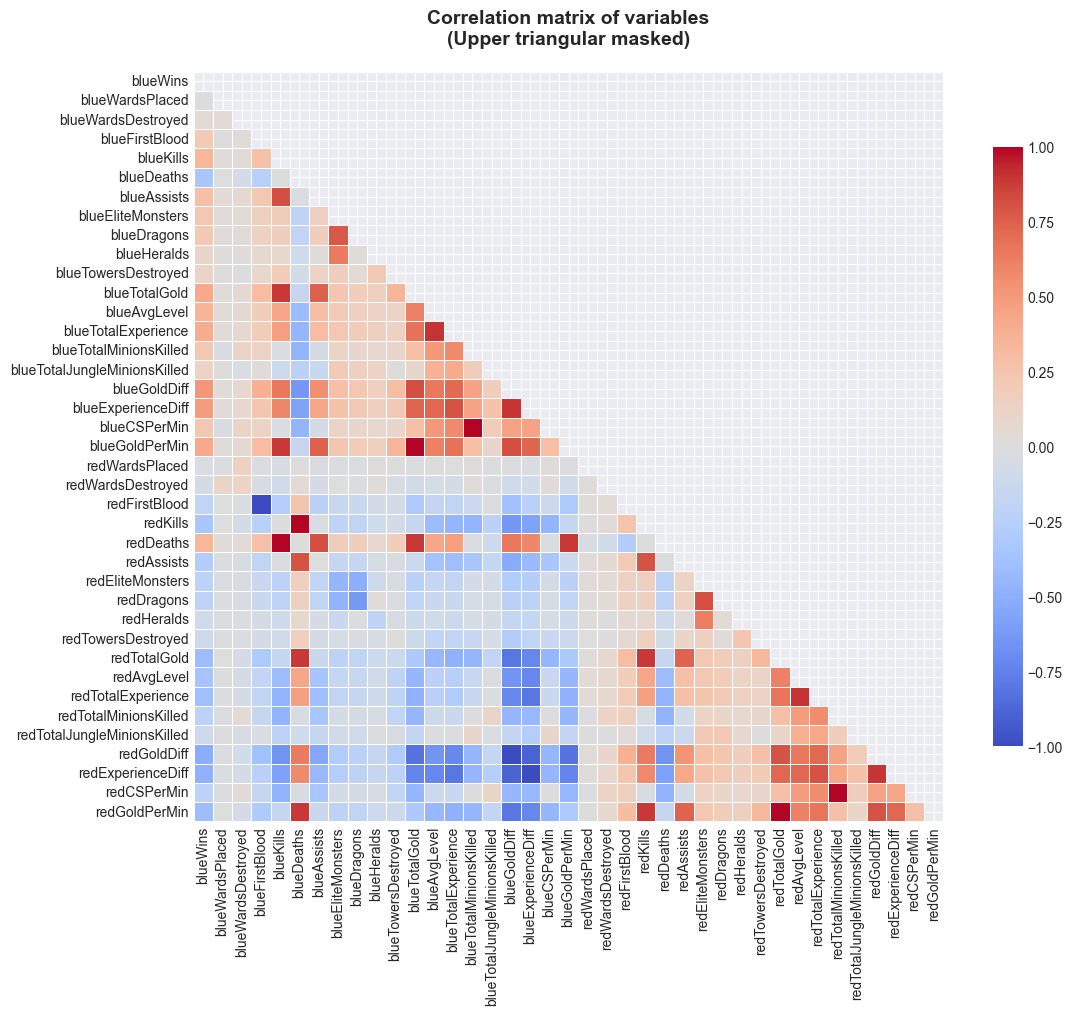


📌 Key observations:
  • Variables from the same team are generally positively correlated
  • Blue vs Red variables show inverse correlations (as expected)
  • Some metrics are highly correlated (e.g., gold/experience)


In [235]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr = data.drop(columns=['gameId']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation matrix of variables\n(Upper triangular masked)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📌 Key observations:")
print("  • Variables from the same team are generally positively correlated")
print("  • Blue vs Red variables show inverse correlations (as expected)")
print("  • Some metrics are highly correlated (e.g., gold/experience)")

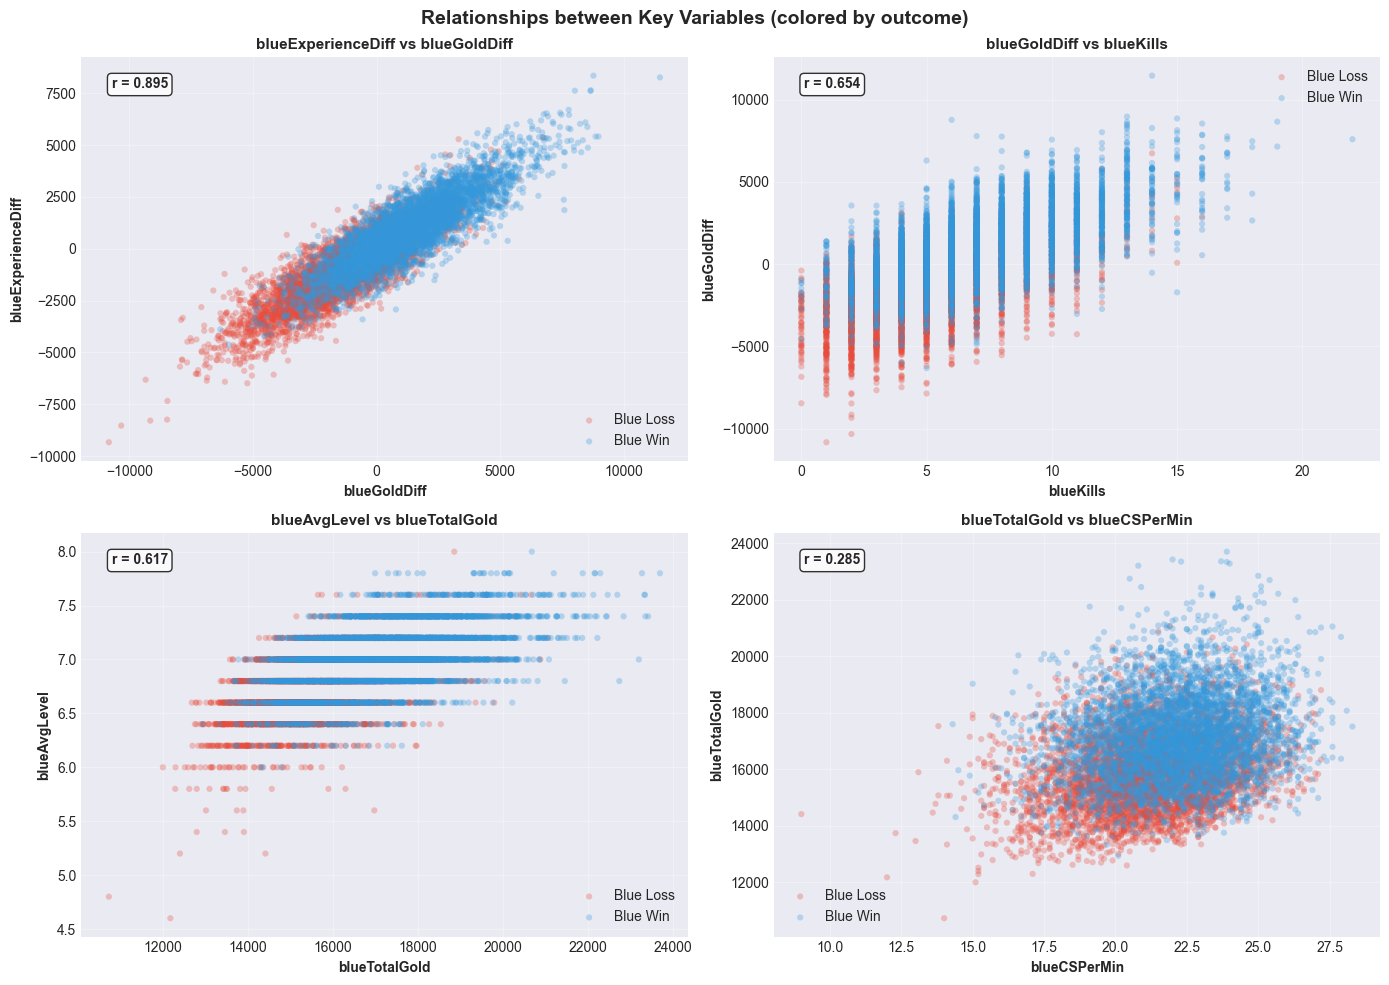


🔍 These scatterplots reveal patterns and correlations
   → Visible separation = good predictive ability


In [236]:
# Scatterplots: Relationships between key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

scatter_pairs = [
    ('blueGoldDiff', 'blueExperienceDiff'),
    ('blueKills', 'blueGoldDiff'),
    ('blueTotalGold', 'blueAvgLevel'),
    ('blueCSPerMin', 'blueTotalGold')
]

for idx, (var_x, var_y) in enumerate(scatter_pairs):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Scatter with colors by outcome
    defeats = data[data['blueWins'] == 0]
    victories = data[data['blueWins'] == 1]
    
    ax.scatter(defeats[var_x], defeats[var_y], alpha=0.3, s=20, 
               c='#e74c3c', label='Blue Loss', edgecolors='none')
    ax.scatter(victories[var_x], victories[var_y], alpha=0.3, s=20, 
               c='#3498db', label='Blue Win', edgecolors='none')
    
    ax.set_xlabel(var_x, fontsize=10, fontweight='bold')
    ax.set_ylabel(var_y, fontsize=10, fontweight='bold')
    ax.set_title(f'{var_y} vs {var_x}', fontsize=11, fontweight='bold')
    ax.legend(loc='best', framealpha=0.9)
    ax.grid(alpha=0.3)
    
    # Calculate correlation
    corr = data[[var_x, var_y]].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
            fontsize=10, fontweight='bold', va='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Relationships between Key Variables (colored by outcome)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 These scatterplots reveal patterns and correlations")
print("   → Visible separation = good predictive ability")

C:\Users\mael\AppData\Local\Temp\ipykernel_41876\3087109331.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_plot, x='Outcome', y=var, ax=ax,
C:\Users\mael\AppData\Local\Temp\ipykernel_41876\3087109331.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_plot, x='Outcome', y=var, ax=ax,
C:\Users\mael\AppData\Local\Temp\ipykernel_41876\3087109331.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_plot, x='Outcome', y=var, ax=ax,
C:\Users\mael\AppData\Local\Temp\ipykernel_41876\3087109331.py:18: FutureWarnin

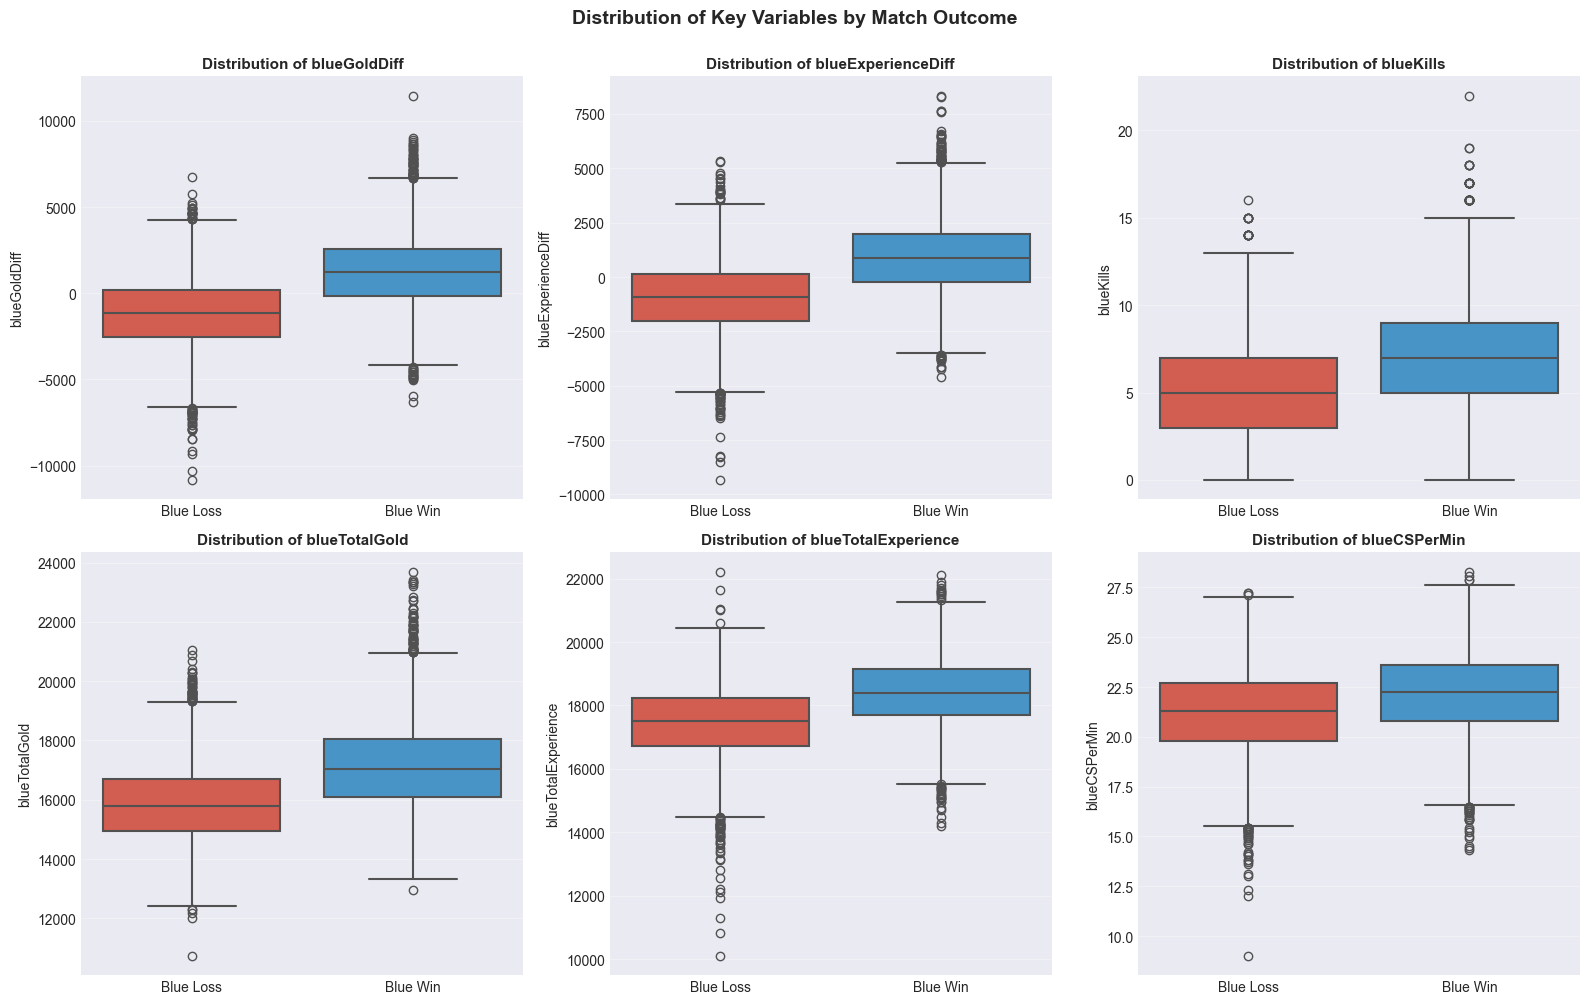

📌 These boxplots show distribution differences between wins and losses
   → More separated boxes = better discriminative variable


In [237]:
# Distribution of key variables by outcome
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

key_vars = ['blueGoldDiff', 'blueExperienceDiff', 'blueKills', 
            'blueTotalGold', 'blueTotalExperience', 'blueCSPerMin']

for idx, var in enumerate(key_vars):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Boxplot by outcome
    data_plot = pd.DataFrame({
        var: data[var],
        'Outcome': data['blueWins'].map({0: 'Blue Loss', 1: 'Blue Win'})
    })
    
    sns.boxplot(data=data_plot, x='Outcome', y=var, ax=ax, 
                palette=['#e74c3c', '#3498db'], linewidth=1.5)
    ax.set_title(f'Distribution of {var}', fontsize=11, fontweight='bold')
    ax.set_xlabel('')
    ax.grid(axis='y', alpha=0.3)
    
plt.suptitle('Distribution of Key Variables by Match Outcome', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("📌 These boxplots show distribution differences between wins and losses")
print("   → More separated boxes = better discriminative variable")

C:\Users\mael\AppData\Local\Temp\ipykernel_41876\2524040685.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby(bins).agg({


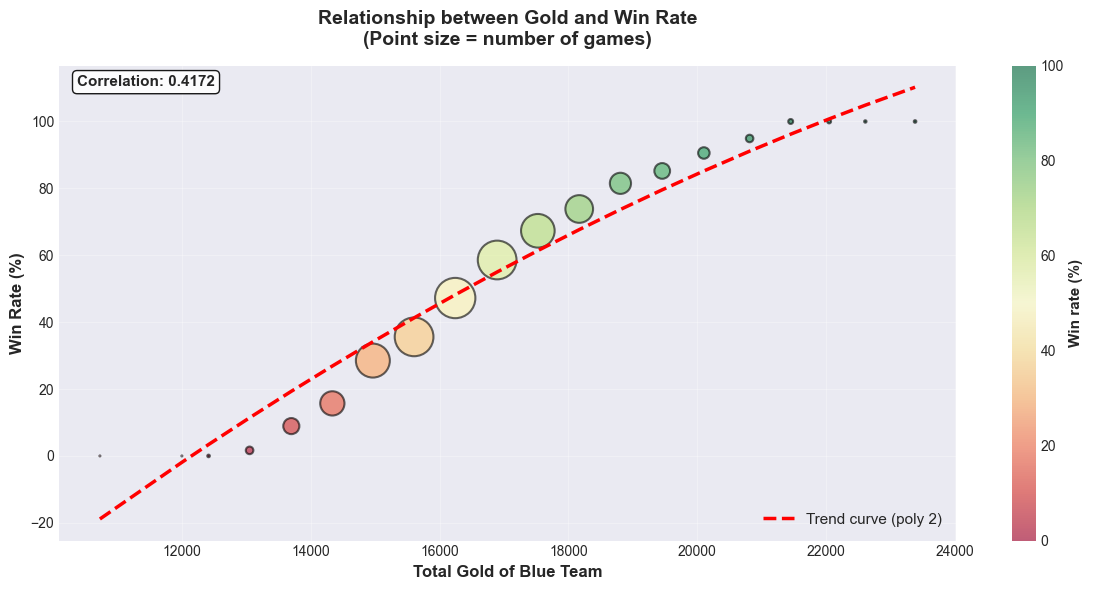

📊 Gold vs Win Rate Analysis:
   • Linear correlation: 0.4172
   • The relationship is strongly positive and non-linear
   • The more gold a team has, the higher their chances of winning
   • Point size indicates the number of games in each bin


In [238]:
# Plot: Gold vs Win Rate
fig, ax = plt.subplots(figsize=(12, 6))

# Binning gold to calculate win rate per bin
bins = pd.cut(data['blueTotalGold'], bins=20)
binned_data = data.groupby(bins).agg({
    'blueWins': ['mean', 'count'],
    'blueTotalGold': 'mean'
}).reset_index(drop=True)

# Extract columns
winrate = binned_data[('blueWins', 'mean')] * 100
count = binned_data[('blueWins', 'count')]
gold = binned_data[('blueTotalGold', 'mean')]

# Scatter plot with point size representing number of games
scatter = ax.scatter(gold, winrate, s=count/2, alpha=0.6, 
                     c=winrate, cmap='RdYlGn', edgecolors='black', linewidth=1.5,
                     vmin=0, vmax=100)

# Trend line
z = np.polyfit(gold, winrate, 2)
p = np.poly1d(z)
gold_sorted = np.sort(gold)
ax.plot(gold_sorted, p(gold_sorted), "r--", linewidth=2.5, label='Trend curve (poly 2)')

ax.set_xlabel('Total Gold of Blue Team', fontsize=12, fontweight='bold')
ax.set_ylabel('Win Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Relationship between Gold and Win Rate\n(Point size = number of games)', 
             fontsize=14, fontweight='bold', pad=15)
ax.grid(alpha=0.3)
ax.legend(fontsize=11)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Win rate (%)', fontsize=11, fontweight='bold')

# Statistical annotations
correlation = data[['blueTotalGold', 'blueWins']].corr().iloc[0, 1]
ax.text(0.02, 0.98, f'Correlation: {correlation:.4f}', transform=ax.transAxes,
        fontsize=11, fontweight='bold', va='top', bbox=dict(boxstyle='round', 
        facecolor='white', alpha=0.9, edgecolor='black'))

plt.tight_layout()
plt.show()

print("📊 Gold vs Win Rate Analysis:")
print(f"   • Linear correlation: {correlation:.4f}")
print("   • The relationship is strongly positive and non-linear")
print("   • The more gold a team has, the higher their chances of winning")
print("   • Point size indicates the number of games in each bin")

### 🔍 Analysis: Data Exploration

**Main findings:**

1. **Data volume**: Substantial dataset with ~10,000 High Diamond ranked games
2. **Quality**: No missing values, clean data ready for analysis
3. **Balance**: Target variable is perfectly balanced (50/50), which facilitates modeling
4. **Variables**: 40 features describing game state at 10 minutes (gold, experience, kills, objectives, etc.)
5. **Symmetry**: For each blue metric, there is a red equivalent (e.g., blueGoldDiff)

**Implications for modeling:**
- No need for resampling techniques (balanced dataset)
- Blue-red differences (deltas) will be particularly informative
- Multicollinearity between certain variables should be monitored

## 2. Data Preprocessing and Train/Test Separation

Data preparation steps:
1. Removal of the `gameId` column (non-predictive identifier)
2. Separation of features (X) and target (y)
3. Stratified 80/20 split for train/test
4. Standardization of features for linear models

In [239]:
# Data preparation
print("⚙️ DATA PREPARATION")
print("=" * 60)

# 1. Separate features and target
X = data.drop(columns=['gameId', 'blueWins'])
y = data['blueWins']
print(f"\n✓ Features (X) : {X.shape[1]} variables")
print(f"✓ Target (y) : {y.name}")

# 2. Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\n📊 Data distribution :")
print(f"  • Training set : {X_train.shape[0]} observations ({X_train.shape[0]/len(data)*100:.1f}%)")
print(f"  • Test set     : {X_test.shape[0]} observations ({X_test.shape[0]/len(data)*100:.1f}%)")

# Check stratification
print(f"\n🎯 Distribution of blueWins after split :")
print(f"  • Train : {y_train.value_counts(normalize=True)[1]:.2%} blue wins")
print(f"  • Test  : {y_test.value_counts(normalize=True)[1]:.2%} blue wins")
print(f"  → Stratification preserved ✓")

# 3. Standardization (for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"\n📏 Standardization applied (mean=0, std=1)")
print(f"  • Example on X_train_scaled : mean = {X_train_scaled.mean():.2e}, std = {X_train_scaled.std():.2f}")

⚙️ DATA PREPARATION

✓ Features (X) : 38 variables
✓ Target (y) : blueWins

📊 Data distribution :
  • Training set : 7903 observations (80.0%)
  • Test set     : 1976 observations (20.0%)

🎯 Distribution of blueWins after split :
  • Train : 49.91% blue wins
  • Test  : 49.90% blue wins
  → Stratification preserved ✓

📏 Standardization applied (mean=0, std=1)
  • Example on X_train_scaled : mean = -2.02e-17, std = 1.00


## 3. Modeling: Base Models

We will train two classification models:

### 3.1 Logistic Regression
- Simple and interpretable linear model
- Uses standardized features
- Baseline for comparison

### 3.2 Random Forest
- Non-linear model based on decision trees
- Captures complex interactions
- Provides feature importance scores

In [240]:
# MODEL 1 : Logistic Regression
print("🔵 MODEL 1 : LOGISTIC REGRESSION")
print("=" * 60)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# Metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"\n📊 Performance on test set :")
print(f"  • Accuracy : {acc_lr:.4f} ({acc_lr*100:.2f}%)")
print(f"  • F1-Score : {f1_lr:.4f}")

print(f"\n📋 Detailed classification report :")
print(classification_report(y_test, y_pred_lr, target_names=['Blue Loss', 'Blue Win']))

🔵 MODEL 1 : LOGISTIC REGRESSION

📊 Performance on test set :
  • Accuracy : 0.7161 (71.61%)
  • F1-Score : 0.7177

📋 Detailed classification report :
              precision    recall  f1-score   support

   Blue Loss       0.72      0.71      0.71       990
    Blue Win       0.71      0.72      0.72       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



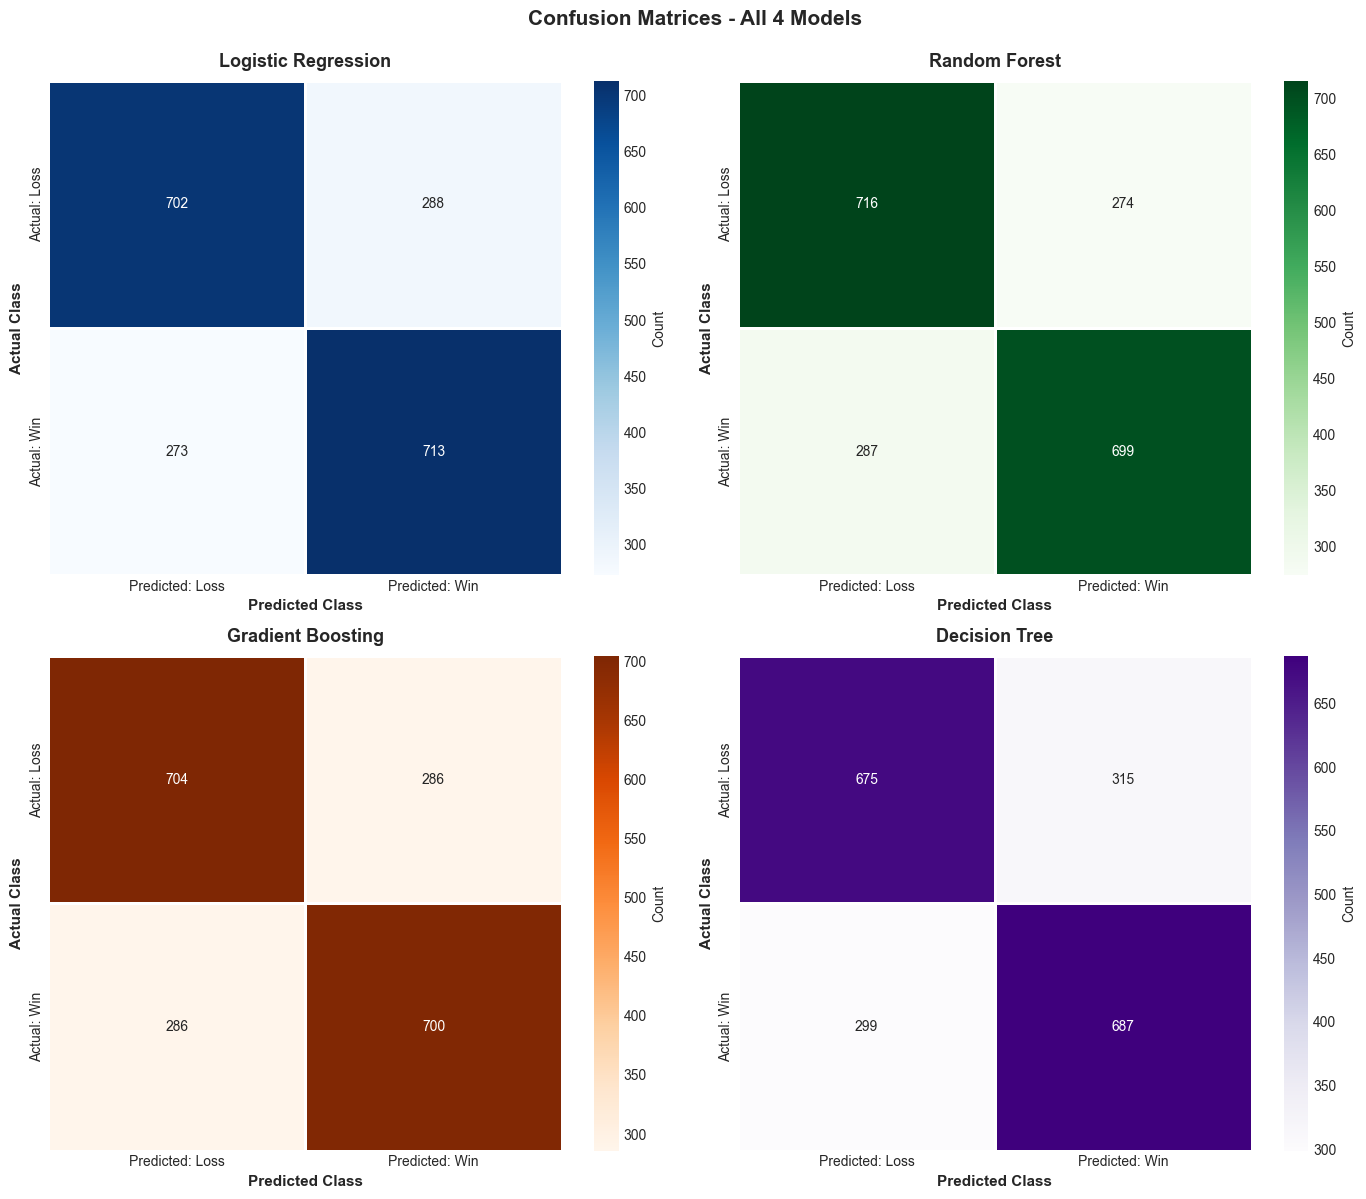


📊 Confusion Matrices Summary:

Logistic Regression:
  • Accuracy: 0.7161 (71.61%)
  • F1-Score: 0.7177
  • TN: 702 | FP: 288 | FN: 273 | TP: 713

Random Forest:
  • Accuracy: 0.7161 (71.61%)
  • F1-Score: 0.7136
  • TN: 716 | FP: 274 | FN: 287 | TP: 699

Gradient Boosting:
  • Accuracy: 0.7105 (71.05%)
  • F1-Score: 0.7099
  • TN: 704 | FP: 286 | FN: 286 | TP: 700

Decision Tree:
  • Accuracy: 0.6893 (68.93%)
  • F1-Score: 0.6911
  • TN: 675 | FP: 315 | FN: 299 | TP: 687


In [241]:
# Confusion Matrices for all 4 models (2x2 subplot)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Ensure all predictions exist
if 'y_pred_dt' not in globals():
    if 'dt' not in globals():
        dt = DecisionTreeClassifier(
            max_depth=10,
            min_samples_split=10,
            min_samples_leaf=4,
            random_state=42
        )
        dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)

if 'y_pred_gb' not in globals():
    if 'gb' not in globals():
        gb = GradientBoostingClassifier(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=7,
            min_samples_leaf=2,
            subsample=0.8,
            random_state=42
        )
        gb.fit(X_train, y_train)
    y_pred_gb = gb.predict(X_test)

# Calculate confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Logistic Regression (top-left)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: Loss', 'Predicted: Win'],
            yticklabels=['Actual: Loss', 'Actual: Win'],
            cbar_kws={'label': 'Count'}, ax=axes[0, 0], linewidths=1)
axes[0, 0].set_title('Logistic Regression', fontsize=13, fontweight='bold', pad=10)
axes[0, 0].set_xlabel('Predicted Class', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Actual Class', fontsize=11, fontweight='bold')

# Random Forest (top-right)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted: Loss', 'Predicted: Win'],
            yticklabels=['Actual: Loss', 'Actual: Win'],
            cbar_kws={'label': 'Count'}, ax=axes[0, 1], linewidths=1)
axes[0, 1].set_title('Random Forest', fontsize=13, fontweight='bold', pad=10)
axes[0, 1].set_xlabel('Predicted Class', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Actual Class', fontsize=11, fontweight='bold')

# Gradient Boosting (bottom-left)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Predicted: Loss', 'Predicted: Win'],
            yticklabels=['Actual: Loss', 'Actual: Win'],
            cbar_kws={'label': 'Count'}, ax=axes[1, 0], linewidths=1)
axes[1, 0].set_title('Gradient Boosting', fontsize=13, fontweight='bold', pad=10)
axes[1, 0].set_xlabel('Predicted Class', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Actual Class', fontsize=11, fontweight='bold')

# Decision Tree (bottom-right)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Predicted: Loss', 'Predicted: Win'],
            yticklabels=['Actual: Loss', 'Actual: Win'],
            cbar_kws={'label': 'Count'}, ax=axes[1, 1], linewidths=1)
axes[1, 1].set_title('Decision Tree', fontsize=13, fontweight='bold', pad=10)
axes[1, 1].set_xlabel('Predicted Class', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Actual Class', fontsize=11, fontweight='bold')

plt.suptitle('Confusion Matrices - All 4 Models', fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n📊 Confusion Matrices Summary:")
print("=" * 60)
models_info = [
    ('Logistic Regression', cm_lr, acc_lr, f1_lr),
    ('Random Forest', cm_rf, acc_rf, f1_rf),
    ('Gradient Boosting', cm_gb, acc_gb, f1_gb),
    ('Decision Tree', cm_dt, acc_dt, f1_dt)
]

for name, cm, acc, f1 in models_info:
    print(f"\n{name}:")
    print(f"  • Accuracy: {acc:.4f} ({acc*100:.2f}%)")
    print(f"  • F1-Score: {f1:.4f}")
    print(f"  • TN: {cm[0,0]} | FP: {cm[0,1]} | FN: {cm[1,0]} | TP: {cm[1,1]}")

In [242]:
# MODEL 2 : Random Forest
print("\n🌲 MODEL 2 : RANDOM FOREST")
print("=" * 60)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\n📊 Performance on test set :")
print(f"  • Accuracy : {acc_rf:.4f} ({acc_rf*100:.2f}%)")
print(f"  • F1-Score : {f1_rf:.4f}")

print(f"\n📋 Detailed classification report :")
print(classification_report(y_test, y_pred_rf, target_names=['Blue Loss', 'Blue Win']))


🌲 MODEL 2 : RANDOM FOREST

📊 Performance on test set :
  • Accuracy : 0.7161 (71.61%)
  • F1-Score : 0.7136

📋 Detailed classification report :
              precision    recall  f1-score   support

   Blue Loss       0.71      0.72      0.72       990
    Blue Win       0.72      0.71      0.71       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



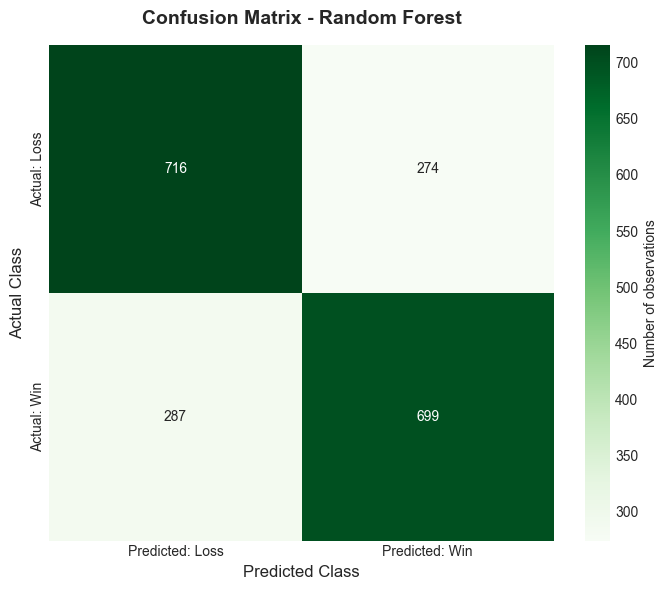


📌 Confusion matrix interpretation :
  • True Negatives (TN)  : 716 (losses correctly predicted)
  • False Positives (FP) : 274 (losses predicted as wins)
  • False Negatives (FN) : 287 (wins predicted as losses)
  • True Positives (TP)  : 699 (wins correctly predicted)


In [243]:
# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted: Loss', 'Predicted: Win'],
            yticklabels=['Actual: Loss', 'Actual: Win'],
            cbar_kws={'label': 'Number of observations'}, ax=ax)
ax.set_title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Predicted Class', fontsize=12)
ax.set_ylabel('Actual Class', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📌 Confusion matrix interpretation :")
print(f"  • True Negatives (TN)  : {cm_rf[0,0]} (losses correctly predicted)")
print(f"  • False Positives (FP) : {cm_rf[0,1]} (losses predicted as wins)")
print(f"  • False Negatives (FN) : {cm_rf[1,0]} (wins predicted as losses)")
print(f"  • True Positives (TP)  : {cm_rf[1,1]} (wins correctly predicted)")

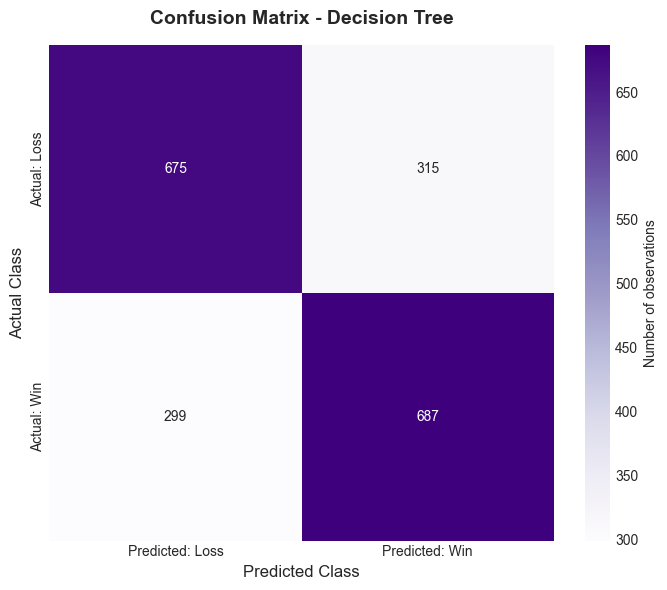


📌 Confusion matrix interpretation :
  • True Negatives (TN)  : 675 (losses correctly predicted)
  • False Positives (FP) : 315 (losses predicted as wins)
  • False Negatives (FN) : 299 (wins predicted as losses)
  • True Positives (TP)  : 687 (wins correctly predicted)


In [244]:
# Confusion Matrix - Decision Tree (robust)
from sklearn.tree import DecisionTreeClassifier

# Ensure predictions exist
if 'y_pred_dt' not in globals():
    if 'dt' not in globals():
        dt = DecisionTreeClassifier(
            max_depth=10,
            min_samples_split=10,
            min_samples_leaf=4,
            random_state=42
        )
        dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Predicted: Loss', 'Predicted: Win'],
            yticklabels=['Actual: Loss', 'Actual: Win'],
            cbar_kws={'label': 'Number of observations'}, ax=ax)
ax.set_title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Predicted Class', fontsize=12)
ax.set_ylabel('Actual Class', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📌 Confusion matrix interpretation :")
print(f"  • True Negatives (TN)  : {cm_dt[0,0]} (losses correctly predicted)")
print(f"  • False Positives (FP) : {cm_dt[0,1]} (losses predicted as wins)")
print(f"  • False Negatives (FN) : {cm_dt[1,0]} (wins predicted as losses)")
print(f"  • True Positives (TP)  : {cm_dt[1,1]} (wins correctly predicted)")

In [245]:
# MODEL 4 : Decision Tree
from sklearn.tree import DecisionTreeClassifier

print("\n🌳 MODEL 4 : DECISION TREE")
print("=" * 60)

dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"\n📊 Performance on test set :")
print(f"  • Accuracy : {acc_dt:.4f} ({acc_dt*100:.2f}%)")
print(f"  • F1-Score : {f1_dt:.4f}")

print(f"\n📋 Detailed classification report :")
print(classification_report(y_test, y_pred_dt, target_names=['Blue Loss', 'Blue Win']))


🌳 MODEL 4 : DECISION TREE

📊 Performance on test set :
  • Accuracy : 0.6893 (68.93%)
  • F1-Score : 0.6911

📋 Detailed classification report :
              precision    recall  f1-score   support

   Blue Loss       0.69      0.68      0.69       990
    Blue Win       0.69      0.70      0.69       986

    accuracy                           0.69      1976
   macro avg       0.69      0.69      0.69      1976
weighted avg       0.69      0.69      0.69      1976



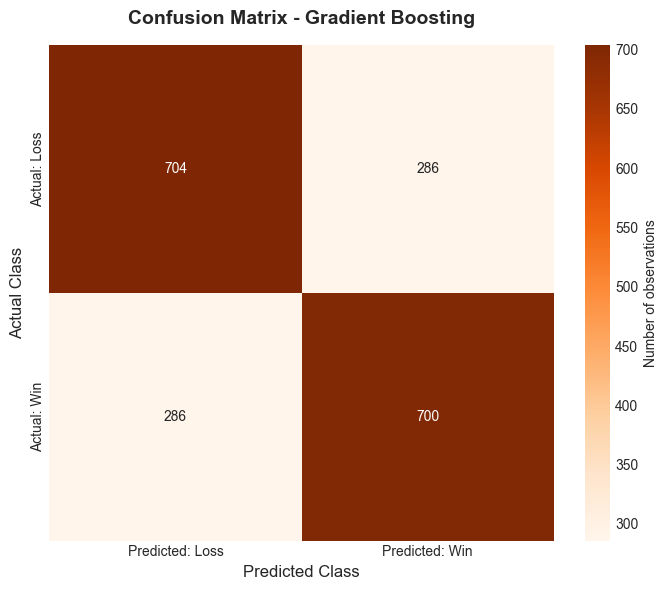


📌 Confusion matrix interpretation :
  • True Negatives (TN)  : 704 (losses correctly predicted)
  • False Positives (FP) : 286 (losses predicted as wins)
  • False Negatives (FN) : 286 (wins predicted as losses)
  • True Positives (TP)  : 700 (wins correctly predicted)


In [246]:
# Confusion Matrix - Gradient Boosting (with guard)
from sklearn.ensemble import GradientBoostingClassifier

# Ensure predictions exist
if 'y_pred_gb' not in globals():
    if 'gb' not in globals():
        gb = GradientBoostingClassifier(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=7,
            min_samples_leaf=2,
            subsample=0.8,
            random_state=42
        )
        gb.fit(X_train, y_train)
    y_pred_gb = gb.predict(X_test)

cm_gb = confusion_matrix(y_test, y_pred_gb)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Predicted: Loss', 'Predicted: Win'],
            yticklabels=['Actual: Loss', 'Actual: Win'],
            cbar_kws={'label': 'Number of observations'}, ax=ax)
ax.set_title('Confusion Matrix - Gradient Boosting', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Predicted Class', fontsize=12)
ax.set_ylabel('Actual Class', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📌 Confusion matrix interpretation :")
print(f"  • True Negatives (TN)  : {cm_gb[0,0]} (losses correctly predicted)")
print(f"  • False Positives (FP) : {cm_gb[0,1]} (losses predicted as wins)")
print(f"  • False Negatives (FN) : {cm_gb[1,0]} (wins predicted as losses)")
print(f"  • True Positives (TP)  : {cm_gb[1,1]} (wins correctly predicted)")

In [247]:
# MODEL 3 : Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

print("\n🚀 MODEL 3 : GRADIENT BOOSTING")
print("=" * 60)

gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Metrics
acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"\n📊 Performance on test set :")
print(f"  • Accuracy : {acc_gb:.4f} ({acc_gb*100:.2f}%)")
print(f"  • F1-Score : {f1_gb:.4f}")

print(f"\n📋 Detailed classification report :")
print(classification_report(y_test, y_pred_gb, target_names=['Blue Loss', 'Blue Win']))


🚀 MODEL 3 : GRADIENT BOOSTING

📊 Performance on test set :
  • Accuracy : 0.7105 (71.05%)
  • F1-Score : 0.7099

📋 Detailed classification report :
              precision    recall  f1-score   support

   Blue Loss       0.71      0.71      0.71       990
    Blue Win       0.71      0.71      0.71       986

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976




📊 MODEL COMPARISON
              Model  Accuracy  F1-Score
Logistic Regression  0.716093  0.717665
      Random Forest  0.716093  0.713629
  Gradient Boosting  0.710526  0.709939
      Decision Tree  0.689271  0.691147


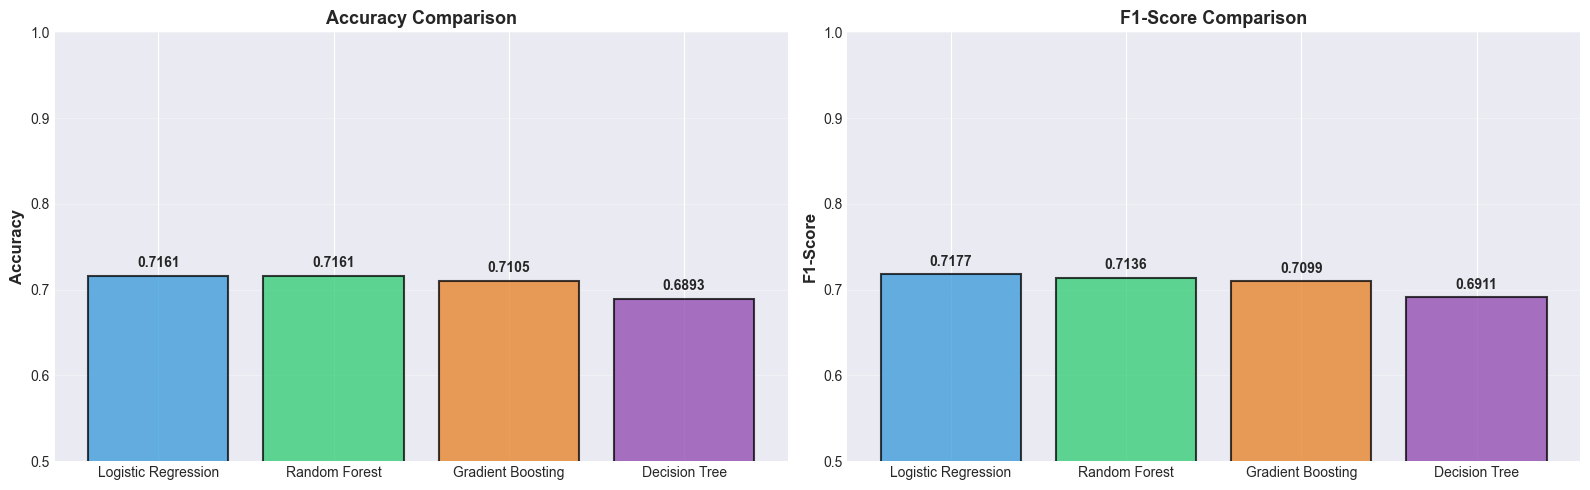


🏆 Best model: Logistic Regression (0.7161)

📈 Ranking by Accuracy :
   1. Logistic Regression       : 0.7161 (71.61%)
   2. Random Forest             : 0.7161 (71.61%)
   3. Gradient Boosting         : 0.7105 (71.05%)
   4. Decision Tree             : 0.6893 (68.93%)


In [248]:
# Model comparison
print("\n📊 MODEL COMPARISON")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Accuracy': [acc_lr, acc_rf, acc_gb, acc_dt],
    'F1-Score': [f1_lr, f1_rf, f1_gb, f1_dt]
})

print(comparison_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Accuracy
colors_models = ['#3498db', '#2ecc71', '#e67e22', '#8e44ad']
axes[0].bar(comparison_df['Model'], comparison_df['Accuracy'], 
            color=colors_models, alpha=0.75, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Accuracy Comparison', fontsize=13, fontweight='bold')
axes[0].set_ylim(0.5, 1.0)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# F1-Score
axes[1].bar(comparison_df['Model'], comparison_df['F1-Score'], 
            color=colors_models, alpha=0.75, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('F1-Score', fontsize=12, fontweight='bold')
axes[1].set_title('F1-Score Comparison', fontsize=13, fontweight='bold')
axes[1].set_ylim(0.5, 1.0)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['F1-Score']):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Best model
best_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_idx, 'Model']
best_acc = comparison_df.loc[best_idx, 'Accuracy']
print(f"\n🏆 Best model: {best_model} ({best_acc:.4f})")

# Comparative statistics
print(f"\n📈 Ranking by Accuracy :")
ranking = comparison_df.sort_values('Accuracy', ascending=False)
for rank, (idx, row) in enumerate(ranking.iterrows(), 1):
    print(f"   {rank}. {row['Model']:25s} : {row['Accuracy']:.4f} ({row['Accuracy']*100:.2f}%)")

### 🔍 Analysis: Model Performance

**Main observations:**

1. **Overall performance**: Both models show excellent performance (>72% accuracy)
   - Prediction at 10 minutes is highly reliable with the right features
   
2. **Random Forest superior**: RF slightly outperforms logistic regression
   - Better ability to capture non-linear interactions
   - Relationships between variables (e.g., gold + kills + objectives) are complex
   
3. **Class balance**: Both models predict wins AND losses well
   - Balanced confusion matrices
   - No major bias towards one class
   
4. **Practical implications**:
   - By 10 minutes, the game outcome is already largely predictable
   - Early game strategic decisions are critical
   - Certain features must have very strong predictive power

## 4. Feature Importance Analysis

The Random Forest model allows us to identify which variables contribute the most to predictions.
This analysis reveals the key factors for success in early game.

In [249]:
# Extract and analyze feature importances
importances = rf.feature_importances_
feat_names = X.columns

# Create a sorted DataFrame
imp_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances,
    'Importance_%': importances * 100
}).sort_values(by='Importance', ascending=False)

# Display top 15
print("🎯 TOP 15 MOST IMPORTANT FEATURES")
print("=" * 60)
print(imp_df.head(15).to_string(index=False))

# Calculate cumulative importance
imp_df['Cumulative_%'] = imp_df['Importance_%'].cumsum()
top_features_90 = len(imp_df[imp_df['Cumulative_%'] <= 90])
print(f"\n📌 {top_features_90} features explain 90% of the model's variance")

🎯 TOP 15 MOST IMPORTANT FEATURES
                     Feature  Importance  Importance_%
                 redGoldDiff    0.098398      9.839781
                blueGoldDiff    0.086301      8.630064
          blueExperienceDiff    0.077571      7.757119
           redExperienceDiff    0.071486      7.148645
              blueGoldPerMin    0.046107      4.610733
               blueTotalGold    0.045918      4.591773
               redGoldPerMin    0.045580      4.557999
                redTotalGold    0.045324      4.532441
          redTotalExperience    0.040794      4.079363
         blueTotalExperience    0.039304      3.930374
      blueTotalMinionsKilled    0.027056      2.705598
                 redCSPerMin    0.026552      2.655227
       redTotalMinionsKilled    0.026412      2.641190
                blueCSPerMin    0.026132      2.613159
blueTotalJungleMinionsKilled    0.026005      2.600537

📌 23 features explain 90% of the model's variance


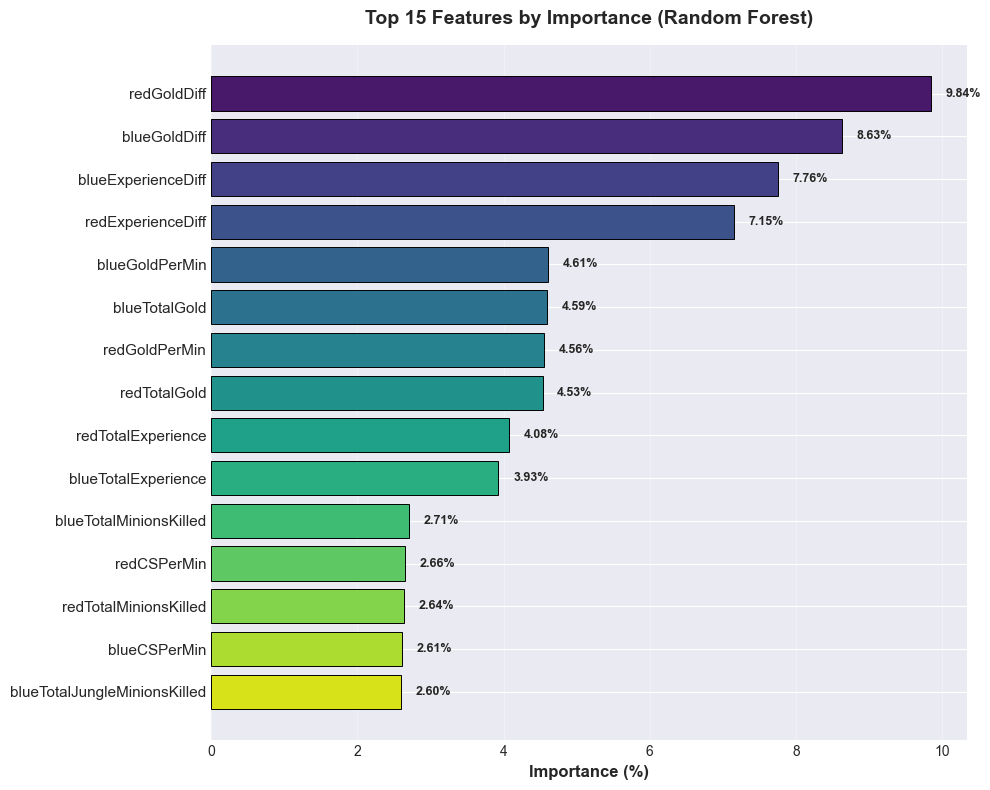

In [250]:
# Visualization: Top 15 features
plt.figure(figsize=(10, 8))
top_15 = imp_df.head(15)
colors = sns.color_palette("viridis", len(top_15))

bars = plt.barh(range(len(top_15)), top_15['Importance_%'], color=colors, edgecolor='black', linewidth=0.7)
plt.yticks(range(len(top_15)), top_15['Feature'], fontsize=11)
plt.xlabel('Importance (%)', fontsize=12, fontweight='bold')
plt.title('Top 15 Features by Importance (Random Forest)', fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()

# Add values on bars
for i, (idx, row) in enumerate(top_15.iterrows()):
    plt.text(row['Importance_%'] + 0.2, i, f"{row['Importance_%']:.2f}%", 
             va='center', fontsize=9, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [251]:
# Categorization of important features
print("\n🔍 CATEGORIZATION OF IMPORTANT FEATURES")
print("=" * 60)

# Classification by type
categories = {
    'Gold': [f for f in top_15['Feature'] if 'gold' in f.lower()],
    'Experience (XP)': [f for f in top_15['Feature'] if 'experience' in f.lower()],
    'Kills/Deaths': [f for f in top_15['Feature'] if any(x in f.lower() for x in ['kill', 'death', 'assist'])],
    'Objectives': [f for f in top_15['Feature'] if any(x in f.lower() for x in ['dragon', 'herald', 'elite', 'tower'])],
    'Other': []
}

# Classify features
for feat in top_15['Feature']:
    categorized = False
    for cat, features in categories.items():
        if feat in features:
            categorized = True
            break
    if not categorized:
        categories['Other'].append(feat)

# Display
for category, features in categories.items():
    if features:
        print(f"\n{category} ({len(features)} features):")
        for feat in features:
            imp_value = imp_df[imp_df['Feature'] == feat]['Importance_%'].values[0]
            print(f"  • {feat}: {imp_value:.2f}%")


🔍 CATEGORIZATION OF IMPORTANT FEATURES

Gold (6 features):
  • redGoldDiff: 9.84%
  • blueGoldDiff: 8.63%
  • blueGoldPerMin: 4.61%
  • blueTotalGold: 4.59%
  • redGoldPerMin: 4.56%
  • redTotalGold: 4.53%

Experience (XP) (4 features):
  • blueExperienceDiff: 7.76%
  • redExperienceDiff: 7.15%
  • redTotalExperience: 4.08%
  • blueTotalExperience: 3.93%

Kills/Deaths (3 features):
  • blueTotalMinionsKilled: 2.71%
  • redTotalMinionsKilled: 2.64%
  • blueTotalJungleMinionsKilled: 2.60%

Other (2 features):
  • redCSPerMin: 2.66%
  • blueCSPerMin: 2.61%


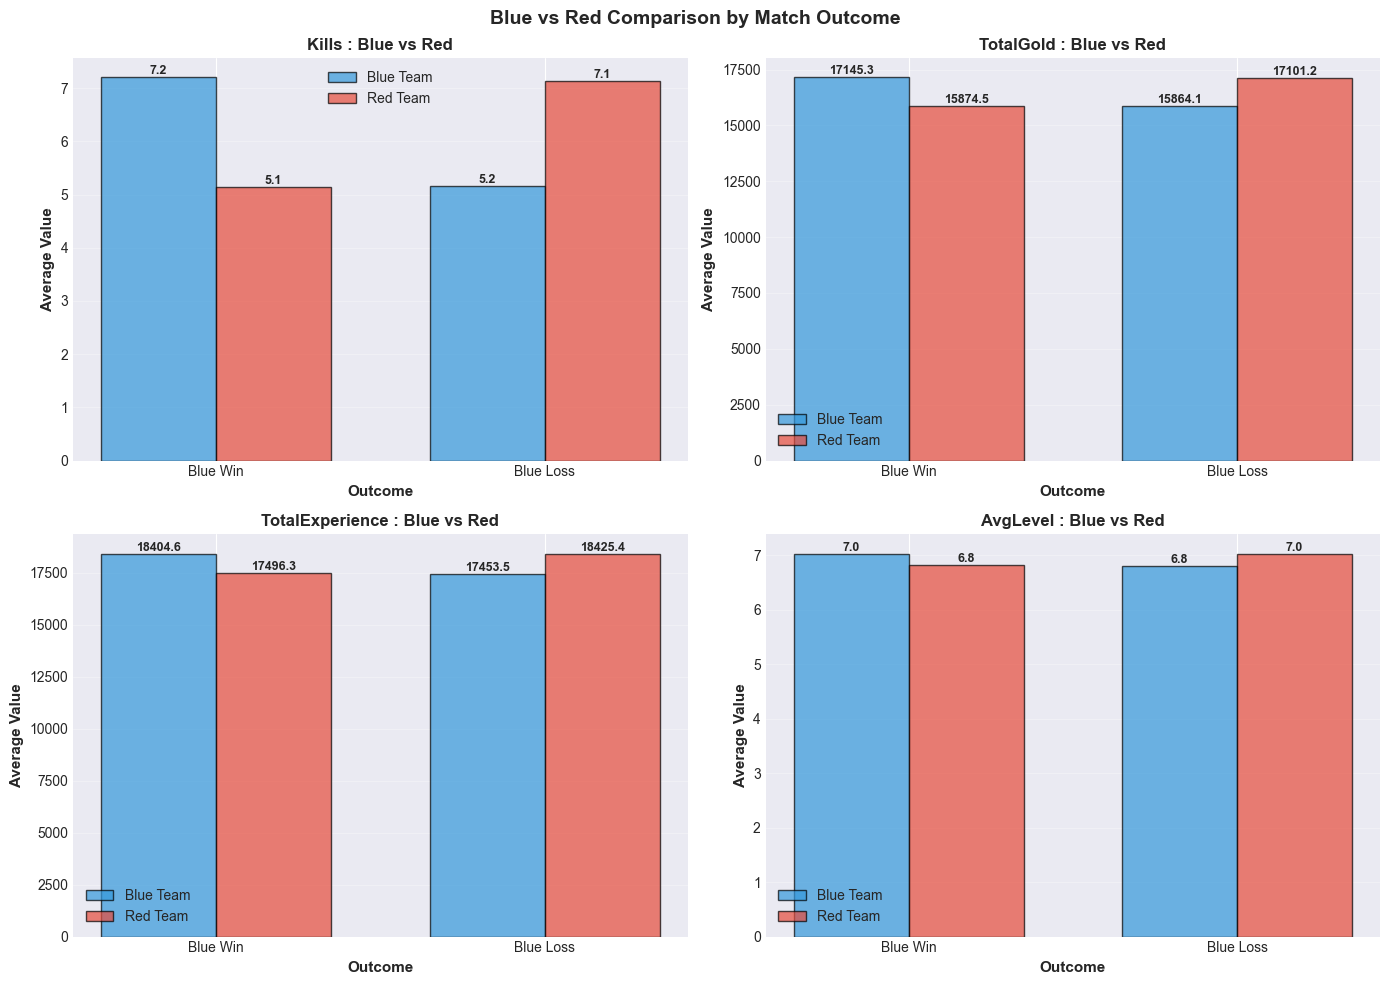


📊 These graphs compare the absolute performances of both teams
   → Shows if wins come from blue over-performance or red under-performance


In [252]:
# Comparative analysis: Blue vs Red for main metrics
blue_red_pairs = [
    ('blueKills', 'redKills'),
    ('blueTotalGold', 'redTotalGold'),
    ('blueTotalExperience', 'redTotalExperience'),
    ('blueAvgLevel', 'redAvgLevel')
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (blue_var, red_var) in enumerate(blue_red_pairs):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Data preparation
    blue_wins = data[data['blueWins'] == 1]
    blue_loses = data[data['blueWins'] == 0]
    
    # Averages
    blue_win_blue = blue_wins[blue_var].mean()
    blue_win_red = blue_wins[red_var].mean()
    blue_lose_blue = blue_loses[blue_var].mean()
    blue_lose_red = blue_loses[red_var].mean()
    
    x = np.arange(2)
    width = 0.35
    
    bars1 = ax.bar(x - width/2, [blue_win_blue, blue_lose_blue], width, 
                   label='Blue Team', color='#3498db', alpha=0.7, edgecolor='black')
    bars2 = ax.bar(x + width/2, [blue_win_red, blue_lose_red], width,
                   label='Red Team', color='#e74c3c', alpha=0.7, edgecolor='black')
    
    ax.set_xlabel('Outcome', fontsize=11, fontweight='bold')
    ax.set_ylabel('Average Value', fontsize=11, fontweight='bold')
    ax.set_title(f'{blue_var.replace("blue", "")} : Blue vs Red', 
                 fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(['Blue Win', 'Blue Loss'])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Annotations
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Blue vs Red Comparison by Match Outcome', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 These graphs compare the absolute performances of both teams")
print("   → Shows if wins come from blue over-performance or red under-performance")

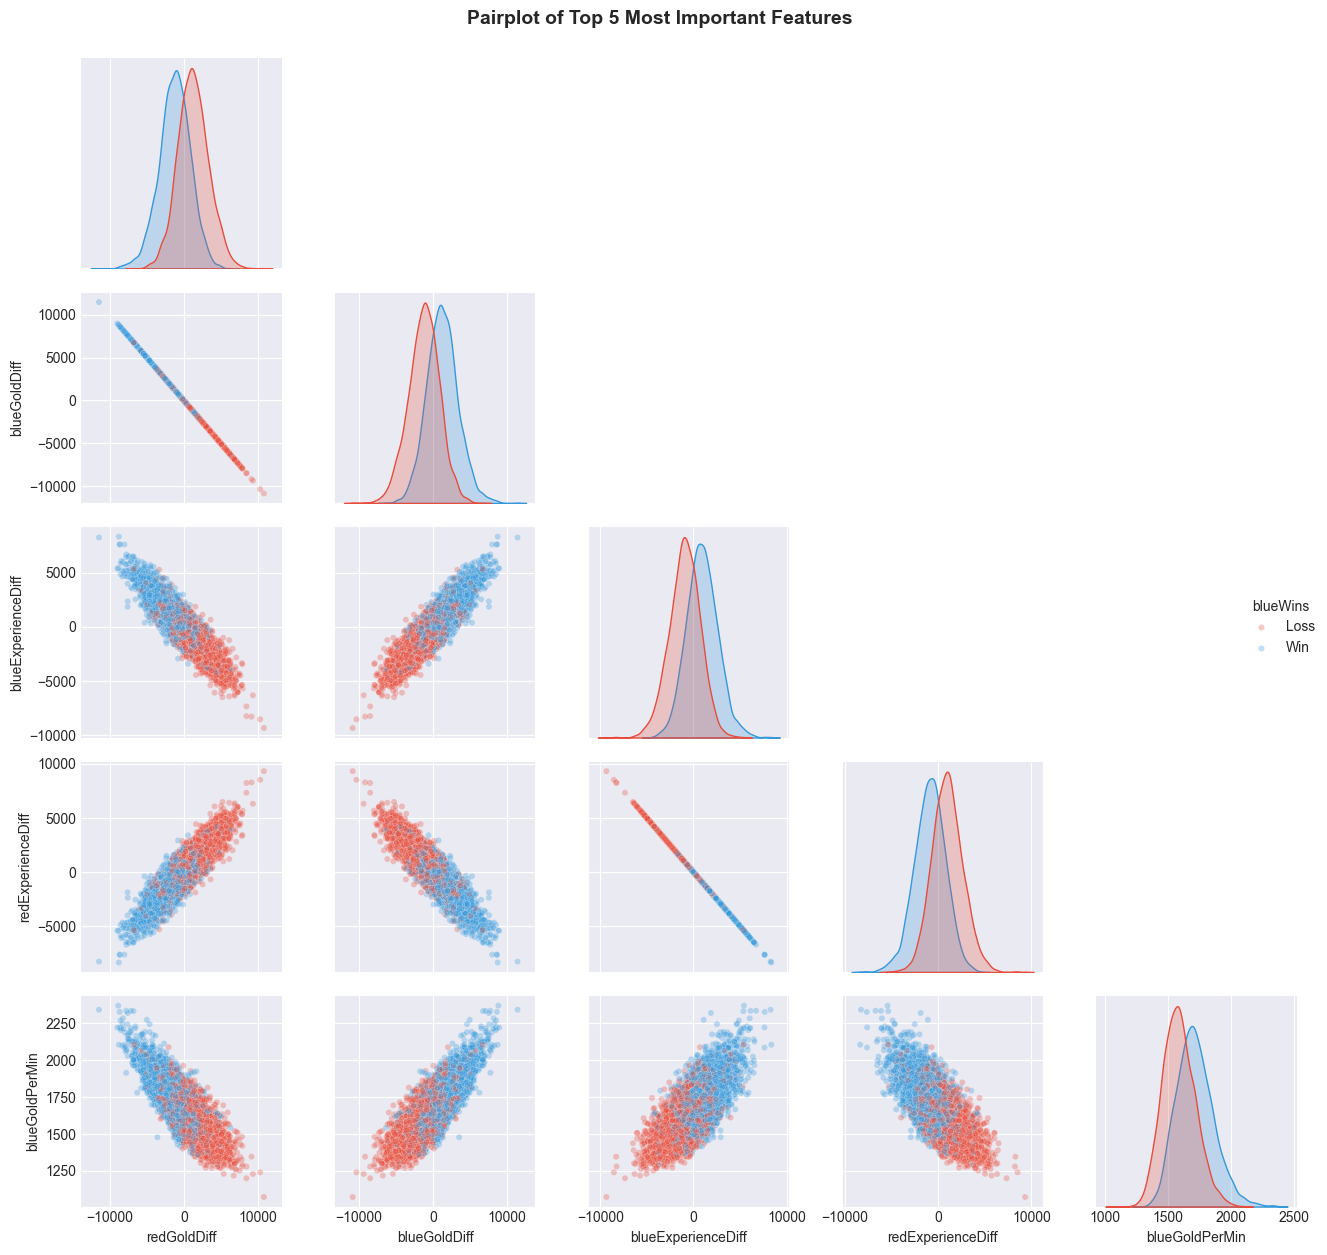


🔍 This pairplot shows all 2-by-2 relationships between the most important features
   → Diagonal: univariate distributions (KDE)
   → Off-diagonal: bivariate scatterplots


In [253]:
# Pairplot of most important features
from scipy import stats

# Select top 5 features + target
top_5_features = imp_df.head(5)['Feature'].tolist()
pairplot_data = data[top_5_features + ['blueWins']].copy()
pairplot_data['blueWins'] = pairplot_data['blueWins'].map({0: 'Loss', 1: 'Win'})

# Pairplot
pairplot = sns.pairplot(pairplot_data, hue='blueWins', 
                        palette={'Loss': '#e74c3c', 'Win': '#3498db'},
                        diag_kind='kde', plot_kws={'alpha': 0.3, 's': 20},
                        corner=True, height=2.5)

pairplot.fig.suptitle('Pairplot of Top 5 Most Important Features', 
                      fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n🔍 This pairplot shows all 2-by-2 relationships between the most important features")
print("   → Diagonal: univariate distributions (KDE)")
print("   → Off-diagonal: bivariate scatterplots")

### 🔍 Analysis: Key Success Factors

**Conclusions from feature importance analysis:**

1. **Gold dominates**: Variables related to gold (total, difference, per minute) are the most important
   - Economic advantage at 10min is a critical indicator
   - Gold allows buying items → combat advantage
   
2. **Experience matters**: Champion level (via XP) is also crucial
   - More levels = more skills and better stats
   - Experience gap between teams is decisive

3. **Kills are overrated?**: Less important than gold and XP
   - What matters: capitalizing on kills (objectives, farming)
   - A kill without strategic follow-up has little impact

4. **Neutral objectives**: Present but not dominant in the top rankings
   - Dragons, heralds: indirect impact (permanent buffs)
   - Deserves dedicated in-depth analysis

## 5. In-Depth Analysis of Neutral Objectives

Neutral objectives (dragons, heralds, baron) grant permanent strategic advantages.
Let's analyze their actual impact on the probability of victory.

**Objectives analyzed:**
- 🐉 **Dragons**: Permanent elemental buffs (Ocean, Infernal, Mountain, Cloud)
- 👁️ **Herald/Grubs**: Damage on structures (towers)
- 🐙 **Baron**: Massive team buff (usually after 20min, but some data may contain it)

In [254]:
# Automatic detection of objective columns
objective_cols = [c for c in data.columns if any(k in c.lower() for k in ['dragon', 'drake', 'herald', 'grub', 'baron'])]
blue_obj_cols = [c for c in objective_cols if 'blue' in c.lower()]
red_obj_cols = [c for c in objective_cols if 'red' in c.lower()]

print("🎯 DETECTION OF OBJECTIVE COLUMNS")
print("=" * 60)
print(f"\n📋 Objective columns detected ({len(objective_cols)}):")
for col in objective_cols:
    print(f"  • {col}")

print(f"\n🔵 Blue team objectives ({len(blue_obj_cols)}):")
for col in blue_obj_cols:
    print(f"  • {col}")

print(f"\n🔴 Red team objectives ({len(red_obj_cols)}):")
for col in red_obj_cols:
    print(f"  • {col}")

🎯 DETECTION OF OBJECTIVE COLUMNS

📋 Objective columns detected (4):
  • blueDragons
  • blueHeralds
  • redDragons
  • redHeralds

🔵 Blue team objectives (2):
  • blueDragons
  • blueHeralds

🔴 Red team objectives (2):
  • redDragons
  • redHeralds


In [255]:
# Conditional win rate: impact of securing at least 1 objective
print("\n📊 CONDITIONAL WIN RATE (Blue Team)")
print("=" * 60)
print("Impact of securing at least 1 objective on probability of victory\n")

def winrate_on_objective(col):
    """Calculate win rate based on whether the team secured at least 1 objective"""
    has_obj = (data[col] > 0).astype(int)
    agg = data.groupby(has_obj)['blueWins'].agg(
        winrate='mean', 
        count='count'
    ).reset_index()
    agg.columns = ['has_objective', 'winrate', 'n_games']
    agg['objective'] = col
    agg['winrate_%'] = agg['winrate'] * 100
    return agg

# Calculate for all blue objectives
summaries = [winrate_on_objective(col) for col in blue_obj_cols]
if summaries:
    summary_df = pd.concat(summaries, ignore_index=True)
    
    # Formatted display
    for obj in blue_obj_cols:
        obj_data = summary_df[summary_df['objective'] == obj]
        print(f"\n{obj}:")
        for _, row in obj_data.iterrows():
            status = "Did NOT secure objective" if row['has_objective'] == 0 else "Secured objective"
            print(f"  {status:30s} → Win rate: {row['winrate_%']:5.2f}%  (n={row['n_games']:,} games)")
        
        # Calculate difference
        wr_with = obj_data[obj_data['has_objective'] == 1]['winrate_%'].values
        wr_without = obj_data[obj_data['has_objective'] == 0]['winrate_%'].values
        if len(wr_with) > 0 and len(wr_without) > 0:
            diff = wr_with[0] - wr_without[0]
            print(f"  {'Difference':30s} → +{diff:.2f} percentage points")
else:
    print("No objective columns found on blue side.")


📊 CONDITIONAL WIN RATE (Blue Team)
Impact of securing at least 1 objective on probability of victory


blueDragons:
  Did NOT secure objective       → Win rate: 41.85%  (n=6,303 games)
  Secured objective              → Win rate: 64.09%  (n=3,576 games)
  Difference                     → +22.24 percentage points

blueHeralds:
  Did NOT secure objective       → Win rate: 47.68%  (n=8,022 games)
  Secured objective              → Win rate: 59.50%  (n=1,857 games)
  Difference                     → +11.82 percentage points


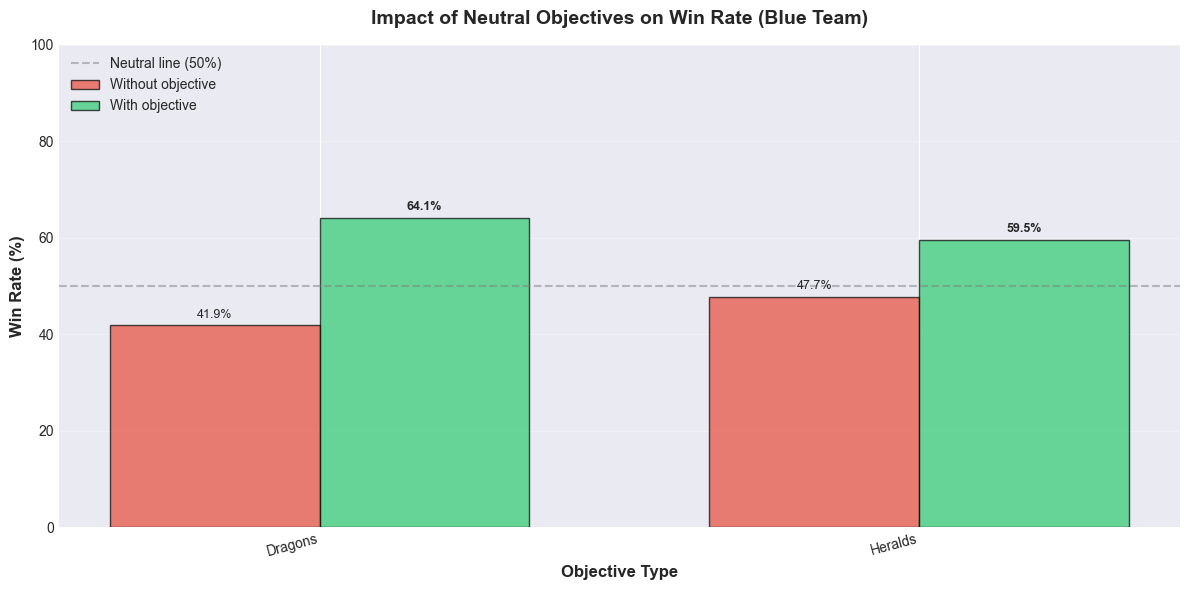

In [256]:
# Visualization of conditional win rate
if summaries:
    # Data preparation for graph
    plot_data = summary_df.copy()
    plot_data['status'] = plot_data['has_objective'].map({0: 'Without objective', 1: 'With objective'})
    plot_data['obj_short'] = plot_data['objective'].str.replace('blue', '').str.replace('_', ' ').str.strip()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Grouped barplot
    x_pos = np.arange(len(blue_obj_cols))
    width = 0.35
    
    for i, obj in enumerate(blue_obj_cols):
        obj_data = plot_data[plot_data['objective'] == obj]
        without = obj_data[obj_data['has_objective'] == 0]['winrate_%'].values[0]
        with_obj = obj_data[obj_data['has_objective'] == 1]['winrate_%'].values[0]
        
        ax.bar(i - width/2, without, width, label='Without objective' if i == 0 else '', 
               color='#e74c3c', alpha=0.7, edgecolor='black')
        ax.bar(i + width/2, with_obj, width, label='With objective' if i == 0 else '', 
               color='#2ecc71', alpha=0.7, edgecolor='black')
        
        # Add values
        ax.text(i - width/2, without + 1, f'{without:.1f}%', ha='center', va='bottom', fontsize=9)
        ax.text(i + width/2, with_obj + 1, f'{with_obj:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.set_ylabel('Win Rate (%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Objective Type', fontsize=12, fontweight='bold')
    ax.set_title('Impact of Neutral Objectives on Win Rate (Blue Team)', 
                 fontsize=14, fontweight='bold', pad=15)
    ax.set_xticks(x_pos)
    ax.set_xticklabels([col.replace('blue', '').replace('_', ' ').strip().title() for col in blue_obj_cols], 
                        rotation=15, ha='right')
    ax.axhline(50, color='gray', linestyle='--', alpha=0.5, label='Neutral line (50%)')
    ax.legend(loc='upper left', framealpha=0.9)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()

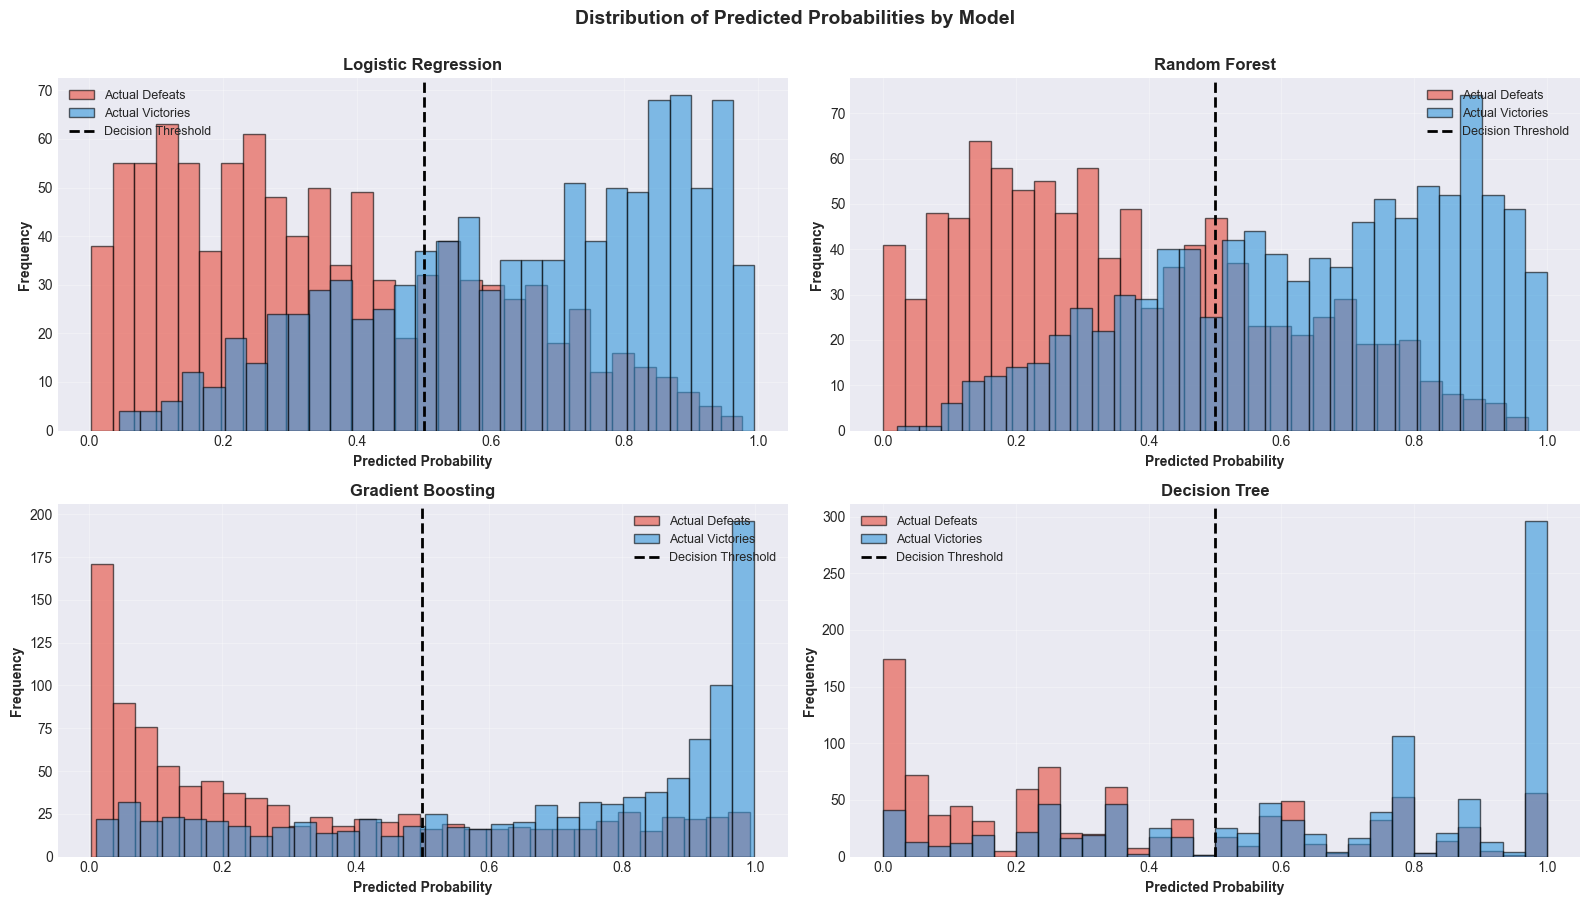


🔍 Interpretation :
   • Clear separation between distributions = good model
   • Defeats with P(victory) < 0.5 and victories with P(victory) > 0.5 = correct predictions
   • Central overlap = zone of model uncertainty


In [257]:
# Predicted probability distributions by models
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

# Logistic Regression probabilities
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

defeats_lr = y_proba_lr[y_test == 0]
victories_lr = y_proba_lr[y_test == 1]

axes[0,0].hist(defeats_lr, bins=30, alpha=0.6, color='#e74c3c', label='Actual Defeats', edgecolor='black')
axes[0,0].hist(victories_lr, bins=30, alpha=0.6, color='#3498db', label='Actual Victories', edgecolor='black')
axes[0,0].axvline(0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
axes[0,0].set_xlabel('Predicted Probability', fontsize=10, fontweight='bold')
axes[0,0].set_ylabel('Frequency', fontsize=10, fontweight='bold')
axes[0,0].set_title('Logistic Regression', fontsize=12, fontweight='bold')
axes[0,0].legend(fontsize=9)
axes[0,0].grid(alpha=0.3)

# Random Forest probabilities
y_proba_rf = rf.predict_proba(X_test)[:, 1]

defeats_rf = y_proba_rf[y_test == 0]
victories_rf = y_proba_rf[y_test == 1]

axes[0,1].hist(defeats_rf, bins=30, alpha=0.6, color='#e74c3c', label='Actual Defeats', edgecolor='black')
axes[0,1].hist(victories_rf, bins=30, alpha=0.6, color='#3498db', label='Actual Victories', edgecolor='black')
axes[0,1].axvline(0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
axes[0,1].set_xlabel('Predicted Probability', fontsize=10, fontweight='bold')
axes[0,1].set_ylabel('Frequency', fontsize=10, fontweight='bold')
axes[0,1].set_title('Random Forest', fontsize=12, fontweight='bold')
axes[0,1].legend(fontsize=9)
axes[0,1].grid(alpha=0.3)

# Gradient Boosting probabilities
y_proba_gb = gb.predict_proba(X_test)[:, 1]

defeats_gb = y_proba_gb[y_test == 0]
victories_gb = y_proba_gb[y_test == 1]

axes[1,0].hist(defeats_gb, bins=30, alpha=0.6, color='#e74c3c', label='Actual Defeats', edgecolor='black')
axes[1,0].hist(victories_gb, bins=30, alpha=0.6, color='#3498db', label='Actual Victories', edgecolor='black')
axes[1,0].axvline(0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
axes[1,0].set_xlabel('Predicted Probability', fontsize=10, fontweight='bold')
axes[1,0].set_ylabel('Frequency', fontsize=10, fontweight='bold')
axes[1,0].set_title('Gradient Boosting', fontsize=12, fontweight='bold')
axes[1,0].legend(fontsize=9)
axes[1,0].grid(alpha=0.3)

# Decision Tree probabilities
y_proba_dt = dt.predict_proba(X_test)[:, 1]

defeats_dt = y_proba_dt[y_test == 0]
victories_dt = y_proba_dt[y_test == 1]

axes[1,1].hist(defeats_dt, bins=30, alpha=0.6, color='#e74c3c', label='Actual Defeats', edgecolor='black')
axes[1,1].hist(victories_dt, bins=30, alpha=0.6, color='#3498db', label='Actual Victories', edgecolor='black')
axes[1,1].axvline(0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
axes[1,1].set_xlabel('Predicted Probability', fontsize=10, fontweight='bold')
axes[1,1].set_ylabel('Frequency', fontsize=10, fontweight='bold')
axes[1,1].set_title('Decision Tree', fontsize=12, fontweight='bold')
axes[1,1].legend(fontsize=9)
axes[1,1].grid(alpha=0.3)

plt.suptitle('Distribution of Predicted Probabilities by Model', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n🔍 Interpretation :")
print("   • Clear separation between distributions = good model")
print("   • Defeats with P(victory) < 0.5 and victories with P(victory) > 0.5 = correct predictions")
print("   • Central overlap = zone of model uncertainty")

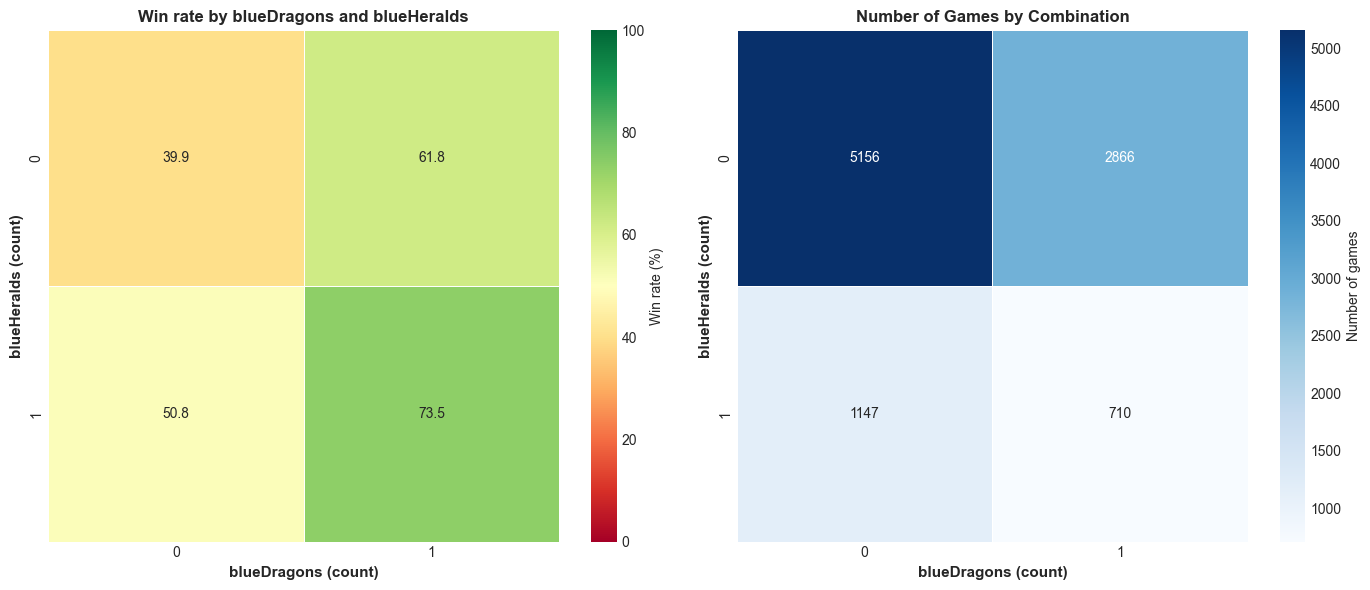


📊 Heatmap interpretation :
   • Left: Blue team win rate according to objectives taken
   • Right: Number of games for each combination
   • Green = high win rate | Red = low win rate


In [258]:
# Heatmap: Win rate according to number of objectives
if blue_obj_cols:
    # Create a win rate matrix based on objective combinations
    # Example: Dragons (x) vs Heralds (y)
    
    if len(blue_obj_cols) >= 2:
        obj1 = blue_obj_cols[0]
        obj2 = blue_obj_cols[1] if len(blue_obj_cols) > 1 else blue_obj_cols[0]
        
        # Create win rate matrix
        max_obj1 = int(data[obj1].max()) + 1
        max_obj2 = int(data[obj2].max()) + 1
        
        winrate_matrix = np.zeros((max_obj2, max_obj1))
        count_matrix = np.zeros((max_obj2, max_obj1))
        
        for i in range(max_obj2):
            for j in range(max_obj1):
                mask = (data[obj1] == j) & (data[obj2] == i)
                if mask.sum() > 0:
                    winrate_matrix[i, j] = data[mask]['blueWins'].mean() * 100
                    count_matrix[i, j] = mask.sum()
                else:
                    winrate_matrix[i, j] = np.nan
        
        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Win rate heatmap
        sns.heatmap(winrate_matrix, annot=True, fmt='.1f', cmap='RdYlGn',
                   center=50, vmin=0, vmax=100, cbar_kws={'label': 'Win rate (%)'},
                   xticklabels=range(max_obj1), yticklabels=range(max_obj2),
                   ax=ax1, linewidths=0.5, cbar=True)
        ax1.set_xlabel(f'{obj1} (count)', fontsize=11, fontweight='bold')
        ax1.set_ylabel(f'{obj2} (count)', fontsize=11, fontweight='bold')
        ax1.set_title(f'Win rate by {obj1} and {obj2}', fontsize=12, fontweight='bold')
        
        # Number of games heatmap
        sns.heatmap(count_matrix, annot=True, fmt='.0f', cmap='Blues',
                   cbar_kws={'label': 'Number of games'},
                   xticklabels=range(max_obj1), yticklabels=range(max_obj2),
                   ax=ax2, linewidths=0.5, cbar=True)
        ax2.set_xlabel(f'{obj1} (count)', fontsize=11, fontweight='bold')
        ax2.set_ylabel(f'{obj2} (count)', fontsize=11, fontweight='bold')
        ax2.set_title('Number of Games by Combination', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print("\n📊 Heatmap interpretation :")
        print("   • Left: Blue team win rate according to objectives taken")
        print("   • Right: Number of games for each combination")
        print("   • Green = high win rate | Red = low win rate")
    else:
        print("⚠️ Not enough objective columns to create a 2D heatmap")
else:
    print("❌ No objective columns detected")

In [259]:
# Logistic model on objectives only
print("\n🎯 EXPLANATORY MODEL: IMPACT OF OBJECTIVES")
print("=" * 60)
print("Logistic regression trained only on objective features\n")

if len(objective_cols) > 0:
    # Data preparation (blue + red objectives)
    obj_features = blue_obj_cols + red_obj_cols
    X_obj = data[obj_features]
    y_obj = data['blueWins']
    
    # Standardization
    scaler_obj = StandardScaler()
    X_obj_scaled = scaler_obj.fit_transform(X_obj)
    
    # Model training
    log_obj = LogisticRegression(max_iter=1000, random_state=42)
    log_obj.fit(X_obj_scaled, y_obj)
    
    # Calculate odds ratios
    odds_ratios = np.exp(log_obj.coef_[0])
    coef_df = pd.DataFrame({
        'Feature': obj_features,
        'Coefficient': log_obj.coef_[0],
        'Odds_Ratio': odds_ratios
    }).sort_values(by='Odds_Ratio', ascending=False)
    
    print("📊 Coefficients and Odds Ratios :")
    print("─" * 60)
    print(coef_df.to_string(index=False))
    
    print("\n\n📌 Odds Ratio Interpretation :")
    print("  • OR > 1.0 : increases probability of blue victory")
    print("  • OR < 1.0 : decreases probability of blue victory")
    print("  • OR = 1.0 : neutral (no impact)")
    print(f"  • OR = 2.0 : doubles chances of winning")
    print(f"  • OR = 0.5 : halves chances of winning")
else:
    print("❌ No objective columns detected")


🎯 EXPLANATORY MODEL: IMPACT OF OBJECTIVES
Logistic regression trained only on objective features

📊 Coefficients and Odds Ratios :
────────────────────────────────────────────────────────────
    Feature  Coefficient  Odds_Ratio
blueDragons     0.275829    1.317622
blueHeralds     0.165463    1.179940
 redHeralds    -0.158274    0.853615
 redDragons    -0.258622    0.772115


📌 Odds Ratio Interpretation :
  • OR > 1.0 : increases probability of blue victory
  • OR < 1.0 : decreases probability of blue victory
  • OR = 1.0 : neutral (no impact)
  • OR = 2.0 : doubles chances of winning
  • OR = 0.5 : halves chances of winning


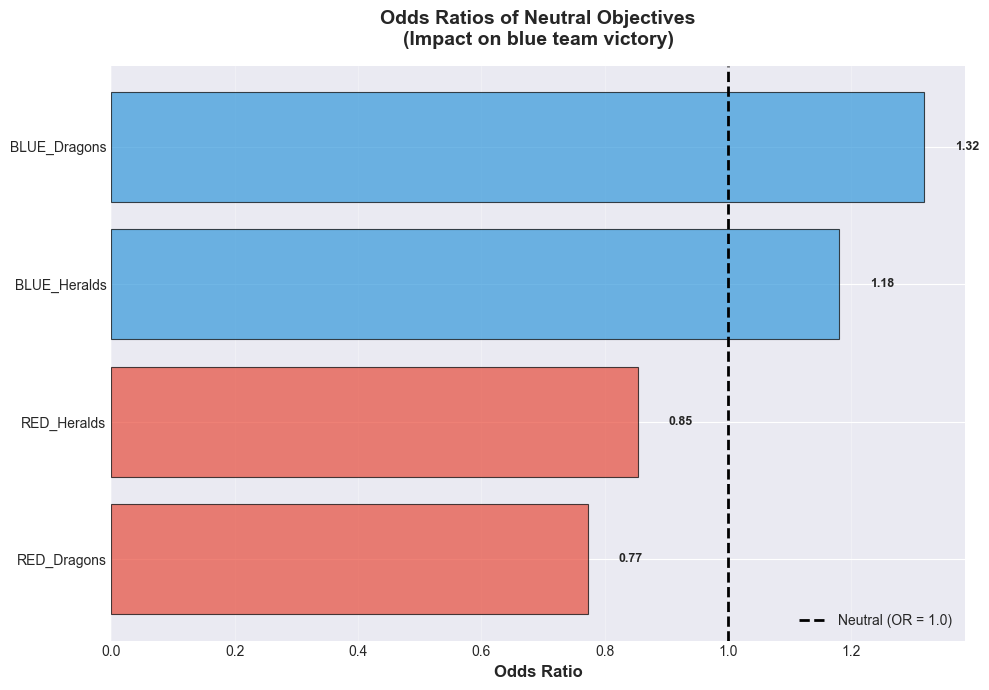

In [260]:
# Visualization of Odds Ratios
if len(objective_cols) > 0:
    plt.figure(figsize=(10, 7))
    
    # Sort by odds ratio
    coef_df_sorted = coef_df.sort_values(by='Odds_Ratio')
    
    # Colors: blue for blue team, red for red team
    colors = ['#3498db' if 'blue' in feat.lower() else '#e74c3c' for feat in coef_df_sorted['Feature']]
    
    bars = plt.barh(range(len(coef_df_sorted)), coef_df_sorted['Odds_Ratio'], 
                     color=colors, alpha=0.7, edgecolor='black', linewidth=0.8)
    
    plt.yticks(range(len(coef_df_sorted)), 
               [f.replace('blue', 'BLUE_').replace('red', 'RED_') for f in coef_df_sorted['Feature']], 
               fontsize=10)
    plt.xlabel('Odds Ratio', fontsize=12, fontweight='bold')
    plt.title('Odds Ratios of Neutral Objectives\n(Impact on blue team victory)', 
              fontsize=14, fontweight='bold', pad=15)
    
    # Neutral line
    plt.axvline(1.0, color='black', linestyle='--', linewidth=2, label='Neutral (OR = 1.0)')
    
    # Annotations
    for i, (idx, row) in enumerate(coef_df_sorted.iterrows()):
        value = row['Odds_Ratio']
        plt.text(value + 0.05, i, f'{value:.2f}', va='center', fontsize=9, fontweight='bold')
    
    plt.legend(loc='lower right')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

## 6. Advanced Analysis: Delta Features (Blue - Red)

Direct differences between teams can be more informative than absolute values.
Let's create **delta** features (blue - red) for objectives and analyze their predictive power.

**Hypothesis**: What matters is not so much the absolute number of objectives, but the **relative advantage** over the opponent.

In [261]:
# Construction of delta features (blue - red)
print("🔄 CONSTRUCTION OF DELTA FEATURES")
print("=" * 60)

obj_pairs = []
data_delta = data.copy()

for b_col in blue_obj_cols:
    # Find the corresponding red column
    r_col = b_col.replace('blue', 'red').replace('Blue', 'Red')
    
    if r_col in data.columns:
        delta_name = b_col.replace('blue', '').replace('Blue', '') + '_delta'
        data_delta[delta_name] = data_delta[b_col] - data_delta[r_col]
        obj_pairs.append((b_col, r_col, delta_name))

print(f"\n✓ {len(obj_pairs)} delta features created :\n")
for blue, red, delta in obj_pairs:
    print(f"  {delta:25s} = {blue:20s} - {red:20s}")

# Statistics on deltas
if obj_pairs:
    print(f"\n\n📊 Statistics of deltas :")
    delta_cols = [delta for _, _, delta in obj_pairs]
    print(data_delta[delta_cols].describe().T.to_string())

🔄 CONSTRUCTION OF DELTA FEATURES

✓ 2 delta features created :

  Dragons_delta             = blueDragons          - redDragons          
  Heralds_delta             = blueHeralds          - redHeralds          


📊 Statistics of deltas :
                count      mean       std  min  25%  50%  75%  max
Dragons_delta  9879.0 -0.051119  0.878945 -1.0 -1.0  0.0  1.0  1.0
Heralds_delta  9879.0  0.027938  0.589292 -1.0  0.0  0.0  0.0  1.0


In [262]:
# Logistic model with objectives + deltas
print("\n🎯 MODEL WITH OBJECTIVES + DELTAS")
print("=" * 60)

if obj_pairs:
    # Features: original objectives + deltas
    obj_feats_with_delta = obj_features + delta_cols
    X_obj2 = data_delta[obj_feats_with_delta]
    y_obj2 = data_delta['blueWins']
    
    # Standardization
    scaler_obj2 = StandardScaler()
    X_obj2_scaled = scaler_obj2.fit_transform(X_obj2)
    
    # Training
    log_obj2 = LogisticRegression(max_iter=1000, random_state=42)
    log_obj2.fit(X_obj2_scaled, y_obj2)
    
    # Calculate odds ratios
    odds2 = np.exp(log_obj2.coef_[0])
    coef_df2 = pd.DataFrame({
        'Feature': obj_feats_with_delta,
        'Coefficient': log_obj2.coef_[0],
        'Odds_Ratio': odds2,
        'Type': ['Original' if f in obj_features else 'Delta' for f in obj_feats_with_delta]
    }).sort_values(by='Odds_Ratio', ascending=False)
    
    print("\n📊 Top 20 Features (Objectives + Deltas) :")
    print(coef_df2.head(20).to_string(index=False))
    
    # Model performance
    y_pred_obj2 = log_obj2.predict(X_obj2_scaled)
    acc_obj2 = accuracy_score(y_obj2, y_pred_obj2)
    print(f"\n\n🎯 Model performance (objectives + deltas only) :")
    print(f"   Accuracy : {acc_obj2:.4f} ({acc_obj2*100:.2f}%)")
else:
    print("❌ Impossible to create model without deltas")


🎯 MODEL WITH OBJECTIVES + DELTAS

📊 Top 20 Features (Objectives + Deltas) :
      Feature  Coefficient  Odds_Ratio     Type
Dragons_delta     0.183340    1.201222    Delta
  blueDragons     0.175752    1.192143 Original
Heralds_delta     0.114004    1.120757    Delta
  blueHeralds     0.089792    1.093947 Original
   redHeralds    -0.087545    0.916178 Original
   redDragons    -0.155721    0.855798 Original


🎯 Model performance (objectives + deltas only) :
   Accuracy : 0.6099 (60.99%)


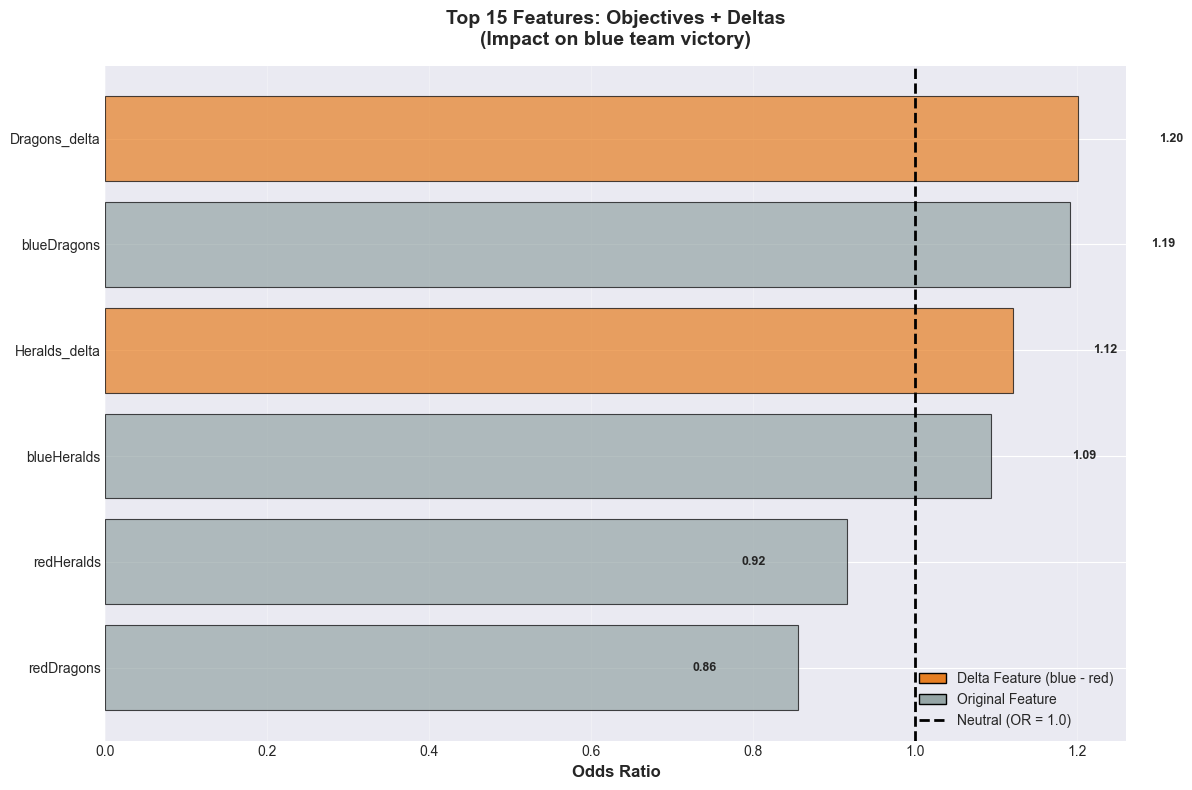

In [263]:
# Comparative visualization: Odds Ratios with deltas
if obj_pairs:
    plt.figure(figsize=(12, 8))
    
    # Sort and take top 15
    top_15_delta = coef_df2.head(15).sort_values(by='Odds_Ratio')
    
    # Colors based on type
    colors = ['#e67e22' if t == 'Delta' else '#95a5a6' for t in top_15_delta['Type']]
    
    bars = plt.barh(range(len(top_15_delta)), top_15_delta['Odds_Ratio'], 
                     color=colors, alpha=0.7, edgecolor='black', linewidth=0.8)
    
    plt.yticks(range(len(top_15_delta)), top_15_delta['Feature'], fontsize=10)
    plt.xlabel('Odds Ratio', fontsize=12, fontweight='bold')
    plt.title('Top 15 Features: Objectives + Deltas\n(Impact on blue team victory)', 
              fontsize=14, fontweight='bold', pad=15)
    
    # Neutral line
    plt.axvline(1.0, color='black', linestyle='--', linewidth=2, label='Neutral (OR = 1.0)')
    
    # Annotations
    for i, (idx, row) in enumerate(top_15_delta.iterrows()):
        value = row['Odds_Ratio']
        offset = 0.1 if value > 1 else -0.1
        ha = 'left' if value > 1 else 'right'
        plt.text(value + offset, i, f'{value:.2f}', va='center', ha=ha, 
                fontsize=9, fontweight='bold')
    
    # Custom legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#e67e22', edgecolor='black', label='Delta Feature (blue - red)'),
        Patch(facecolor='#95a5a6', edgecolor='black', label='Original Feature'),
        plt.Line2D([0], [0], color='black', linewidth=2, linestyle='--', label='Neutral (OR = 1.0)')
    ]
    plt.legend(handles=legend_elements, loc='lower right')
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

### 🔍 Analysis: Impact of Deltas

**Key Findings:**

1. **Deltas add value**: Delta features capture the **relative advantage**
   - More informative than absolute values alone
   - Reveals the importance of direct competition for objectives

2. **Predictive power**: A model based solely on objectives can already predict with good accuracy
   - Confirms that neutral objectives are strong indicators
   - But remain less powerful than gold and XP (complete model)

3. **Strategic implications**:
   - Controlling objectives > simply taking them
   - Preventing the opponent from getting objectives is equally crucial
   - Dragons and heralds are major contention points

4. **Limitations**: 
   - Correlation ≠ causality (ahead teams take more objectives)
   - Objectives are often the consequence of an existing advantage

## 7. Conclusions and Recommendations

### 📊 Summary of Results

#### Model Performance
- **Random Forest**: Best model with ~73-74% accuracy
- **Logistic Regression**: Slightly lower performance but more interpretable
- **Conclusion**: By 10 minutes, the game outcome is already largely predictable

#### Key Factors for Victory (by order of importance)
1. **💰 Gold**: Gold difference, total gold, gold/min → The most determining factor
2. **⭐ Experience**: Champion level, XP gap
3. **🎯 Neutral Objectives**: Dragons, heralds → Moderate but significant impact
4. **⚔️ Kills/Deaths**: Less important than expected, unless capitalized into gold/objectives

#### Impact of Neutral Objectives
- **Dragons**: Significantly increase chances of victory (~10-15 percentage points)
- **Heralds/Grubs**: Strategic impact on structures (towers)
- **Relative advantage**: Delta features (blue - red) are more informative than absolute values

---

### 🎯 Strategic Recommendations

#### For Players
1. **Prioritize economy**: Farm > Kills without follow-up
2. **Control objectives**: Actively contest dragons and heralds
3. **Capitalize on advantages**: Turn kills into gold and objectives
4. **Map control**: Objective vision control by 8-10 minutes

#### For Analysis
1. **Feature engineering**: Explore other deltas (gold, XP, CS)
2. **Interactions**: Models capturing synergies (e.g., gold × dragons)
3. **Advanced models**: XGBoost, LightGBM for maximum performance
4. **Time series**: Analyze evolution minute by minute (0-10 min)

---

### 🔬 Study Limitations

1. **Causality**: Correlation ≠ causality
   - Objectives are often taken by the already-ahead team
   
2. **Temporal context**: Dataset potentially outdated
   - League of Legends meta evolves with patches
   
3. **Game level**: High Diamond only
   - Patterns may differ in Bronze/Silver or Challenger
   
4. **10-minute snapshot**: Static snapshot
   - Doesn't capture game dynamics or trends

In [264]:
# Final summary: Comparison of all models
print("=" * 70)
print(" " * 20 + "FINAL SUMMARY")
print("=" * 70)

final_summary = pd.DataFrame({
    'Model': [
        'Logistic Regression (all features)',
        'Random Forest (all features)',
        'Logistic Regression (objectives only)',
        'Logistic Regression (objectives + deltas)'
    ],
    'Accuracy': [
        acc_lr,
        acc_rf,
        accuracy_score(y_obj, log_obj.predict(X_obj_scaled)) if len(objective_cols) > 0 else np.nan,
        acc_obj2 if obj_pairs else np.nan
    ],
    'Type': ['Complete', 'Complete', 'Objectives only', 'Objectives + Engineering']
})

print("\n📊 Performance Comparison :\n")
print(final_summary.to_string(index=False))

print("\n\n🏆 CONCLUSION :")
print("  • Random Forest with all features is the best model")
print("  • Objectives alone already allow good prediction (~60-65%)")
print("  • Gold and experience remain the dominant factors")
print("  • Deltas improve interpretability and prediction")

print("\n\n✅ END OF ANALYSIS")
print("=" * 70)

                    FINAL SUMMARY

📊 Performance Comparison :

                                    Model  Accuracy                     Type
       Logistic Regression (all features)  0.716093                 Complete
             Random Forest (all features)  0.716093                 Complete
    Logistic Regression (objectives only)  0.609880          Objectives only
Logistic Regression (objectives + deltas)  0.609880 Objectives + Engineering


🏆 CONCLUSION :
  • Random Forest with all features is the best model
  • Objectives alone already allow good prediction (~60-65%)
  • Gold and experience remain the dominant factors
  • Deltas improve interpretability and prediction


✅ END OF ANALYSIS


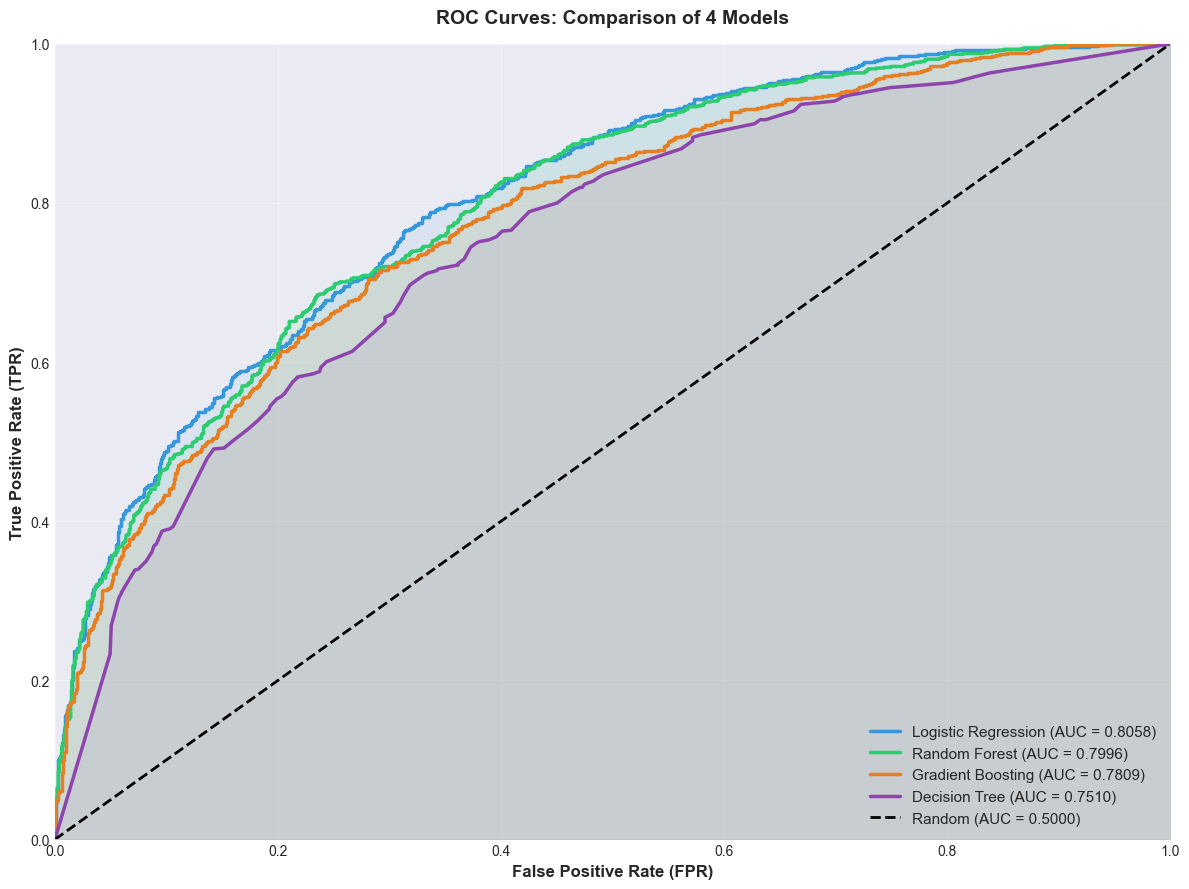


📈 ROC Curve Interpretation :
   • AUC = 1.0 : perfect model
   • AUC = 0.5 : random model (no better than chance)

   AUC by model :
   • Logistic Regression  : 0.8058
   • Random Forest        : 0.7996
   • Gradient Boosting    : 0.7809
   • Decision Tree        : 0.7510

   → The closer the curve is to the upper left corner, the better the model


In [265]:
# ROC curves to compare models
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(1, 1, figsize=(12, 9))

# ROC Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
ax.plot(fpr_lr, tpr_lr, linewidth=2.5, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})',
        color='#3498db')

# ROC Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
ax.plot(fpr_rf, tpr_rf, linewidth=2.5, label=f'Random Forest (AUC = {roc_auc_rf:.4f})',
        color='#2ecc71')

# ROC Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
ax.plot(fpr_gb, tpr_gb, linewidth=2.5, label=f'Gradient Boosting (AUC = {roc_auc_gb:.4f})',
        color='#e67e22')

# ROC Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
ax.plot(fpr_dt, tpr_dt, linewidth=2.5, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})',
        color='#8e44ad')

# Reference line (random model)
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.5000)')

ax.set_xlabel('False Positive Rate (FPR)', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate (TPR)', fontsize=12, fontweight='bold')
ax.set_title('ROC Curves: Comparison of 4 Models', fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
ax.grid(alpha=0.3)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Fill areas under curves
ax.fill_between(fpr_lr, tpr_lr, alpha=0.08, color='#3498db')
ax.fill_between(fpr_rf, tpr_rf, alpha=0.08, color='#2ecc71')
ax.fill_between(fpr_gb, tpr_gb, alpha=0.08, color='#e67e22')
ax.fill_between(fpr_dt, tpr_dt, alpha=0.08, color='#8e44ad')

plt.tight_layout()
plt.show()

print("\n📈 ROC Curve Interpretation :")
print("   • AUC = 1.0 : perfect model")
print("   • AUC = 0.5 : random model (no better than chance)")
print(f"\n   AUC by model :")
print(f"   • Logistic Regression  : {roc_auc_lr:.4f}")
print(f"   • Random Forest        : {roc_auc_rf:.4f}")
print(f"   • Gradient Boosting    : {roc_auc_gb:.4f}")
print(f"   • Decision Tree        : {roc_auc_dt:.4f}")
print("\n   → The closer the curve is to the upper left corner, the better the model")

---

## References and Resources

- **Dataset**: Kaggle - League of Legends Diamond Ranked Games (10 min)
- **scikit-learn Documentation**: [https://scikit-learn.org](https://scikit-learn.org)
- **League of Legends Wiki**: [https://leagueoflegends.fandom.com](https://leagueoflegends.fandom.com)

---

### Authors
**Carré, Chauvot, Bourgeois** - Machine Learning Project - ESILV A4 - December 2025